In [370]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, precision_recall_curve, auc

from xgboost import XGBClassifier

In [162]:
bold_start = '\033[1m'
bold_end = '\033[0m'

In [3]:
#data = pd.read_csv(r"E:\Nextstep\Scaler\Business-Case-Study\Ola\Dataset\ola_driver_scaler.csv")
data = pd.read_csv(r"F:\Muthu_2023\Personal\NextStep\DSCourse\Scaler\Business-Case-Study\Ola\Dataset\ola_driver_scaler.csv")
data.head()

Unnamed: 0    MMM-YY  Driver_ID   Age  Gender City  Education_Level  \
0           0  01/01/19          1  28.0     0.0  C23                2   
1           1  02/01/19          1  28.0     0.0  C23                2   
2           2  03/01/19          1  28.0     0.0  C23                2   
3           3  11/01/20          2  31.0     0.0   C7                2   
4           4  12/01/20          2  31.0     0.0   C7                2   

   Income Dateofjoining LastWorkingDate  Joining Designation  Grade  \
0   57387      24/12/18             NaN                    1      1   
1   57387      24/12/18             NaN                    1      1   
2   57387      24/12/18        03/11/19                    1      1   
3   67016      11/06/20             NaN                    2      2   
4   67016      11/06/20             NaN                    2      2   

   Total Business Value  Quarterly Rating  
0               2381060                 2  
1               -665480                 2  
2                     0                 2  
3                     0                 1  
4                     0                 1

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [5]:
data.describe()

Unnamed: 0     Driver_ID           Age        Gender  \
count  19104.000000  19104.000000  19043.000000  19052.000000   
mean    9551.500000   1415.591133     34.668435      0.418749   
std     5514.994107    810.705321      6.257912      0.493367   
min        0.000000      1.000000     21.000000      0.000000   
25%     4775.750000    710.000000     30.000000      0.000000   
50%     9551.500000   1417.000000     34.000000      0.000000   
75%    14327.250000   2137.000000     39.000000      1.000000   
max    19103.000000   2788.000000     58.000000      1.000000   

       Education_Level         Income  Joining Designation         Grade  \
count     19104.000000   19104.000000         19104.000000  19104.000000   
mean          1.021671   65652.025126             1.690536      2.252670   
std           0.800167   30914.515344             0.836984      1.026512   
min           0.000000   10747.000000             1.000000      1.000000   
25%           0.000000   42383.000000             1.000000      1.000000   
50%           1.000000   60087.000000             1.000000      2.000000   
75%           2.000000   83969.000000             2.000000      3.000000   
max           2.000000  188418.000000             5.000000      5.000000   

       Total Business Value  Quarterly Rating  
count          1.910400e+04      19104.000000  
mean           5.716621e+05          2.008899  
std            1.128312e+06          1.009832  
min           -6.000000e+06          1.000000  
25%            0.000000e+00          1.000000  
50%            2.500000e+05          2.000000  
75%            6.997000e+05          3.000000  
max            3.374772e+07          4.000000

In [6]:
data.describe(include='object')

MMM-YY   City Dateofjoining LastWorkingDate
count      19104  19104         19104            1616
unique        24     29           869             493
top     01/01/19    C20      23/07/15        29/07/20
freq        1022   1008           192              70

## Unique Values

In [6]:
data.nunique()

Unnamed: 0              19104
MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

In [7]:
for col in data.columns:
    if data[col].nunique() < 6:
        print(col, ": ",  data[col].unique())

Gender :  [ 0.  1. nan]
Education_Level :  [2 0 1]
Joining Designation :  [1 2 3 4 5]
Grade :  [1 2 3 4 5]
Quarterly Rating :  [2 1 4 3]


#### Inference:
- Unnamed: 0 contains unique values, doesn't helpful for EDA and model building
- 24 reporting days of drivers are collected in the dataset
- Total number of drivers in the dataset are 2381
- Dataset Characteristics
    - No of drivers: 2381
    - No. of Cities: 29
    - Joining designation are sectored into 5 categories (1 to 5)
    - 5 different grades are given to the drivers (1 to 5)
    - Quarterly ratings are grouped as 4 categories (1 to 4)

## Null values

In [13]:
data.isnull().sum()

Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
LWD_Flag                    0
dtype: int64

In [8]:
data['LWD_Flag'] = data['LastWorkingDate'].fillna(0)
data['LWD_Flag'] = data['LWD_Flag'].apply(lambda x: 1 if x!=0 else 0)
data.groupby('Driver_ID')['LWD_Flag'].sum().value_counts()

1    1616
0     765
Name: LWD_Flag, dtype: int64

#### Inference:
- No. of unique drivers: 2381
- No. of Active drivers: 765 (No last working date)
- No. of inactive drivers: 1616 

In [10]:
df = pd.DataFrame(index=data['Driver_ID'].unique())
cols = list(data.columns)
for i in range(1, data.shape[1]):
    if cols[i] == "Driver_ID":
        continue
    df[cols[i]] = data.groupby("Driver_ID")[cols[i]].unique()
df.head()

MMM-YY     Age Gender   City  \
1                     [01/01/19, 02/01/19, 03/01/19]  [28.0]  [0.0]  [C23]   
2                               [11/01/20, 12/01/20]  [31.0]  [0.0]   [C7]   
4  [12/01/19, 01/01/20, 02/01/20, 03/01/20, 04/01...  [43.0]  [0.0]  [C13]   
5                     [01/01/19, 02/01/19, 03/01/19]  [29.0]  [0.0]   [C9]   
6  [08/01/20, 09/01/20, 10/01/20, 11/01/20, 12/01...  [31.0]  [1.0]  [C11]   

  Education_Level   Income Dateofjoining  LastWorkingDate Joining Designation  \
1             [2]  [57387]    [24/12/18]  [nan, 03/11/19]                 [1]   
2             [2]  [67016]    [11/06/20]            [nan]                 [2]   
4             [2]  [65603]    [12/07/19]  [nan, 27/04/20]                 [2]   
5             [0]  [46368]    [01/09/19]  [nan, 03/07/19]                 [1]   
6             [1]  [78728]    [31/07/20]            [nan]                 [3]   

  Grade   Total Business Value Quarterly Rating LWD_Flag  
1   [1]  [2381060, -665480, 0]              [2]   [0, 1]  
2   [2]                    [0]              [1]      [0]  
4   [2]            [0, 350000]              [1]   [0, 1]  
5   [1]            [0, 120360]              [1]   [0, 1]  
6   [3]           [0, 1265000]           [1, 2]      [0]

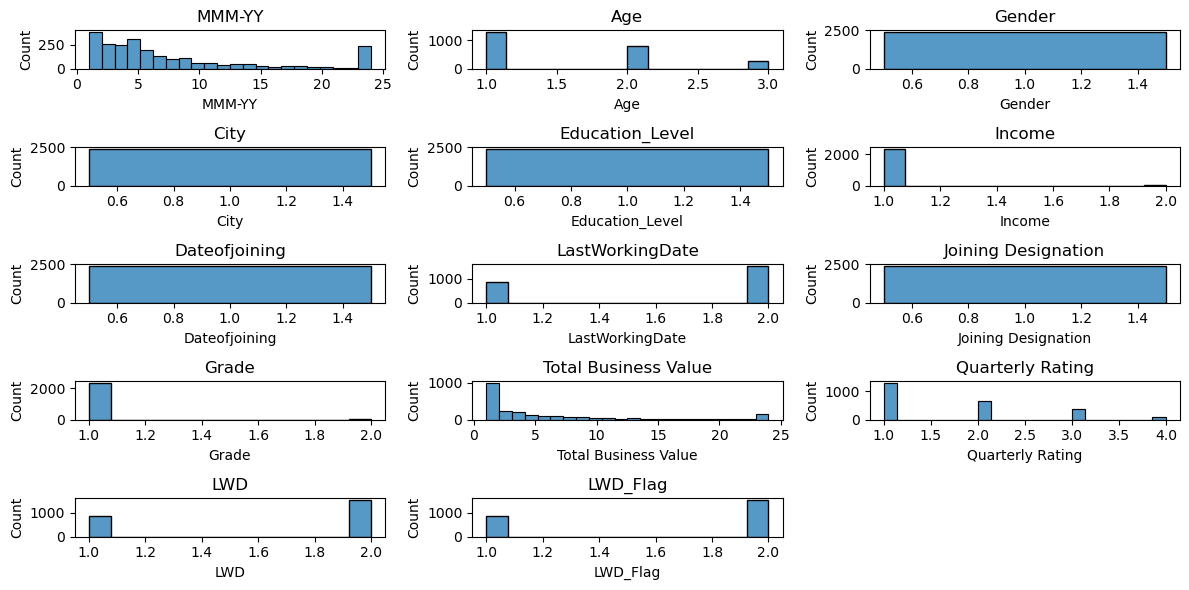

In [65]:
# Check length of unique values in the features in the dataset
plt.figure(figsize=(12,6))
cols_df = list(df.columns)
cnt = 1
for col in cols_df:
    plt.subplot(5,3, cnt)
    sns.histplot(df[col].apply(remove_null).apply(len))
    plt.title(col)
    cnt += 1    
plt.tight_layout()

In [64]:
def remove_null(x):
    try:
        return x[~np.isnan(x)]
    except:
        return x

#### Inference:
- Age:
    - Multiple Age for the same driver is identified, indicates the increase in age
    - Mean Age while grouping
- Grading:
    - Multiple grading for the same driver is identified
    - Calculate change in grading (Current - Initial)
    - Recent Grading
- Gender, City, Education Level, Date of Joining, Joining Designation:
    - Unique values for the driver
- Last Working Date:
    - if no last working date then active driver
- Quarterly Rating:
    - Multiple rating for the same driver is identified
    - Calculation change in rating (current - initial)
- Business Value:
    - Multiple Business value for the same driver is identified
    - Mean business value while grouping
    - No. of negative business value
- Income:
    - Observed Multiple income for single driver
    - Average income, Recent income

In [81]:
for i in a:
    if i == np.nan:
        print(i)

In [83]:
data.dropna().groupby("Driver_ID", dropna=True)['LastWorkingDate'].unique()

Driver_ID
1       [03/11/19]
4       [27/04/20]
5       [03/07/19]
8       [15/11/20]
12      [21/12/19]
           ...    
2779    [14/02/20]
2782    [16/08/19]
2785    [28/10/20]
2786    [22/09/19]
2787    [20/06/19]
Name: LastWorkingDate, Length: 1606, dtype: object

In [105]:
df_final = pd.DataFrame(index=data['Driver_ID'].unique())
df_final['ServiceMonths'] = df['MMM-YY'].apply(len)
df_final['Age'] = df['Age'].apply(np.mean)
df_final['Gender'] = df['Gender'].apply(lambda x: x[0])
df_final['City'] = df['City'].apply(lambda x: x[0])
df_final['Education_Level'] = df['Education_Level'].apply(lambda x: x[0])
df_final['AvgIncome'] = df['Income'].apply(np.mean)
df_final['RecentIncome'] = df['Income'].apply(lambda x: x[-1])
df_final['DOJ_Year'] = pd.to_datetime(df['Dateofjoining'].apply(lambda x: x[0])).dt.year
df_final['DOJ_Month'] = pd.to_datetime(df['Dateofjoining'].apply(lambda x: x[0])).dt.month
df_final['Joining Designation'] = df['Joining Designation'].apply(lambda x: x[0])
df_final['GradeRecent'] = df['Grade'].apply(lambda x: x[-1])
df_final['GradeChange'] = df['Grade'].apply(lambda x: x[-1]-x[0])
df_final['BV'] = df['Total Business Value'].apply(np.mean)
df_final['NegBV'] = df['Total Business Value'].apply(count_neg)
df_final['QRRecent'] = df['Quarterly Rating'].apply(lambda x: x[-1])
df_final['QRChange'] = df['Quarterly Rating'].apply(lambda x: x[-1]-x[0])
df_final['LWD'] = df['LWD_Flag'].apply(np.max)
df_final.head()

ServiceMonths   Age  Gender City  Education_Level  AvgIncome  RecentIncome  \
1              3  28.0     0.0  C23                2    57387.0         57387   
2              2  31.0     0.0   C7                2    67016.0         67016   
4              5  43.0     0.0  C13                2    65603.0         65603   
5              3  29.0     0.0   C9                0    46368.0         46368   
6              5  31.0     1.0  C11                1    78728.0         78728   

   DOJ_Year  DOJ_Month  Joining Designation  GradeRecent  GradeChange  \
1      2018         12                    1            1            0   
2      2020         11                    2            2            0   
4      2019         12                    2            2            0   
5      2019          1                    1            1            0   
6      2020          7                    3            3            0   

         BV  NegBV  QRRecent  QRChange  LWD  
1  571860.0      1         2         0    1  
2       0.0      0         1         0    0  
4  175000.0      0         1         0    1  
5   60180.0      0         1         0    1  
6  632500.0      0         2         1    0

In [60]:
df

ServiceMonths   Age  Gender City  Education_Level  AvgIncome  RecentIncome  \
1              3  28.0     0.0  C23                2    57387.0         57387   
2              2  31.0     0.0   C7                2    67016.0         67016   
4              5  43.0     0.0  C13                2    65603.0         65603   
5              3  29.0     0.0   C9                0    46368.0         46368   
6              5  31.0     1.0  C11                1    78728.0         78728   

   DOJ_Year  DOJ_Month  Joining Designation  GradeRecent  GradeChange  \
1      2018         12                    1            1            0   
2      2020         11                    2            2            0   
4      2019         12                    2            2            0   
5      2019          1                    1            1            0   
6      2020          7                    3            3            0   

         BV  NegBV  QRRecent  LWD  
1  571860.0  125.0         0    1  
2       0.0    9.0         0    0  
4  175000.0    NaN         0    1  
5   60180.0    NaN         0    1  
6  632500.0    NaN         1    0

In [65]:
df_final.isnull().sum()

ServiceMonths           0
Age                    57
Gender                  6
City                    0
Education_Level         0
AvgIncome               0
RecentIncome            0
DOJ_Year                0
DOJ_Month               0
Joining Designation     0
GradeRecent             0
GradeChange             0
BV                      0
NegBV                   0
QRRecent                0
LWD                     0
dtype: int64

In [ ]:
temp = (pd.to_datetime(data.dropna()['LastWorkingDate']) - pd.to_datetime(data.dropna()['Dateofjoining'], dayfirst=True)) / np.timedelta64(1, 'D')
temp[temp<0]

#### Inference:
- Lot of errors in the data collection for datejoining column
- Test:
    - After removing na values, Lastworkingdate - JoiningDate gives many negative values

In [50]:
def count_neg(x):
    cnt = 0
    for val in x:
        if val < 0:
            cnt += 1
    return cnt

In [66]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 1 to 2788
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ServiceMonths        2381 non-null   int64  
 1   Age                  2324 non-null   float64
 2   Gender               2375 non-null   float64
 3   City                 2381 non-null   object 
 4   Education_Level      2381 non-null   int64  
 5   AvgIncome            2381 non-null   float64
 6   RecentIncome         2381 non-null   int64  
 7   DOJ_Year             2381 non-null   int64  
 8   DOJ_Month            2381 non-null   int64  
 9   Joining Designation  2381 non-null   int64  
 10  GradeRecent          2381 non-null   int64  
 11  GradeChange          2381 non-null   int64  
 12  BV                   2381 non-null   float64
 13  NegBV                2381 non-null   int64  
 14  QRRecent             2381 non-null   int64  
 15  LWD                  2381 non-null   i

#### Inference:
- All the columns are numerical except city column that requires categorical encoding
- Age and Gender column requires imputation for Null values

# Exploratory Data Analysis

# Univariate Analysis

In [128]:
target = ['LWD']
cat_features = ['Gender', 'City', 'Education_Level', 'DOJ_Year', 'DOJ_Month', 'Joining Designation', 'GradeRecent', 'GradeChange', 'NegBV', 'QRChange', 'QRRecent']
num_features = [feature for feature in list(df_final.describe().columns) if feature not in target+cat_features]
print("Numerical Features:", num_features)
print("Categorical Features:", cat_features)
print("Target Feature:", target)

Numerical Features: ['ServiceMonths', 'Age', 'AvgIncome', 'RecentIncome', 'BV']
Categorical Features: ['Gender', 'City', 'Education_Level', 'DOJ_Year', 'DOJ_Month', 'Joining Designation', 'GradeRecent', 'GradeChange', 'NegBV', 'QRChange', 'QRRecent']
Target Feature: ['LWD']


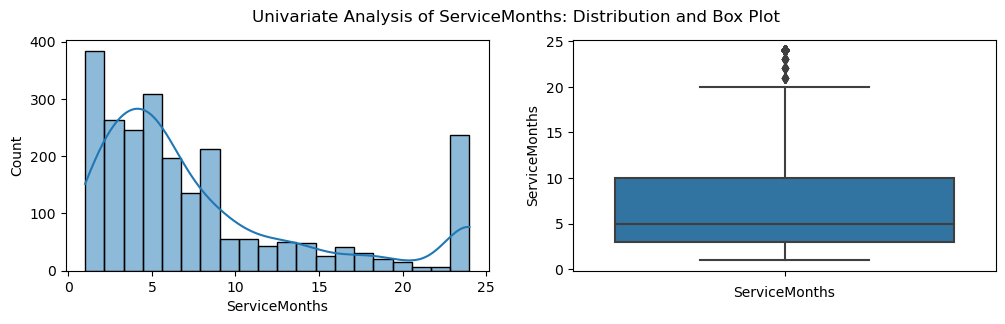

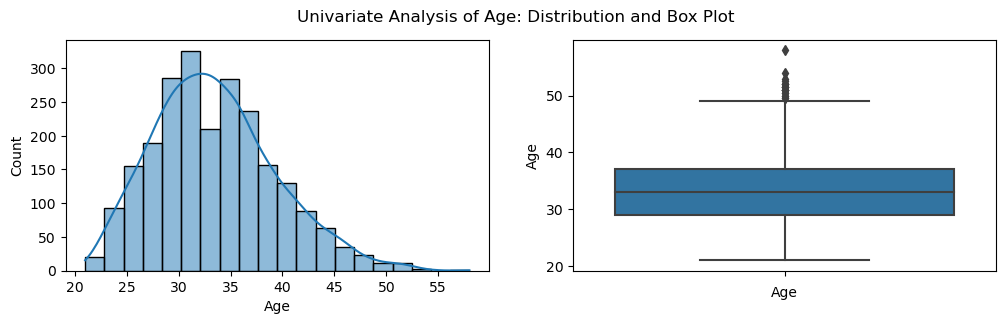

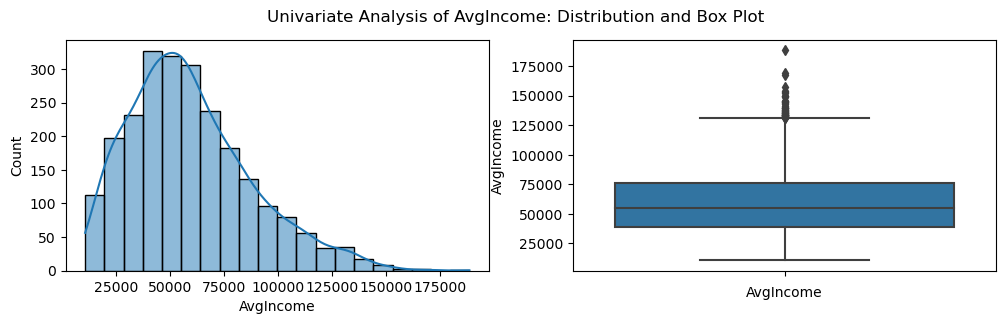

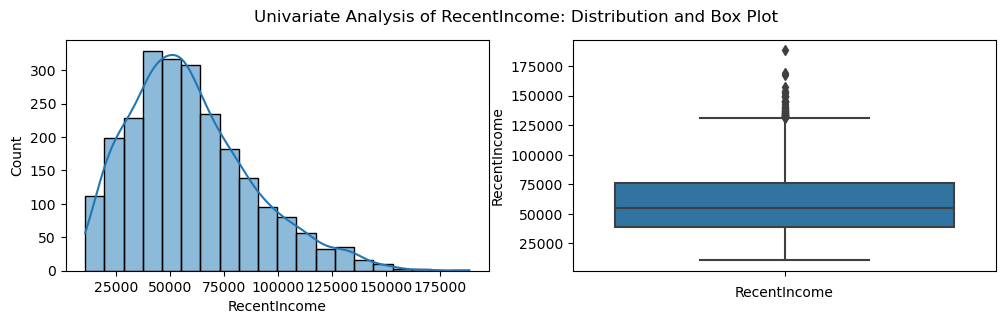

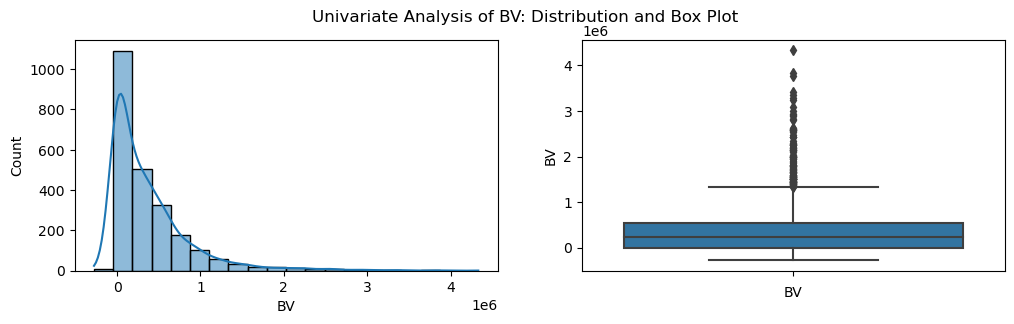

In [129]:
# Numerical Features
for feature in num_features:
    plt.figure(figsize=(12,3))
    plt.suptitle('Univariate Analysis of ' + feature + ": Distribution and Box Plot")
    plt.subplot(1,2,1)
    sns.histplot(df_final[feature], kde=True, bins=20)
    plt.subplot(1,2,2)
    sns.boxplot(data = df_final, y = feature)
    plt.xlabel(feature)

#### Inference:
- Service in months, double peak is observed
- Age is almost normally distributed, hence mean imputation for missing value can be performed
- Average Income and Recent Income seems to follow same distribution and it is slightly right skewed
- Average Business Value is significantly right skewed 

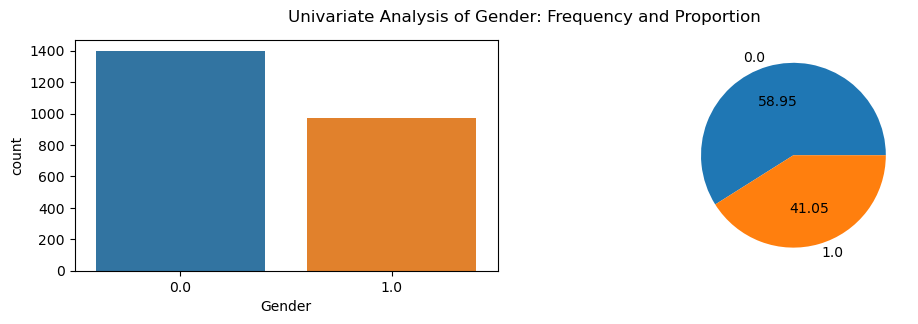

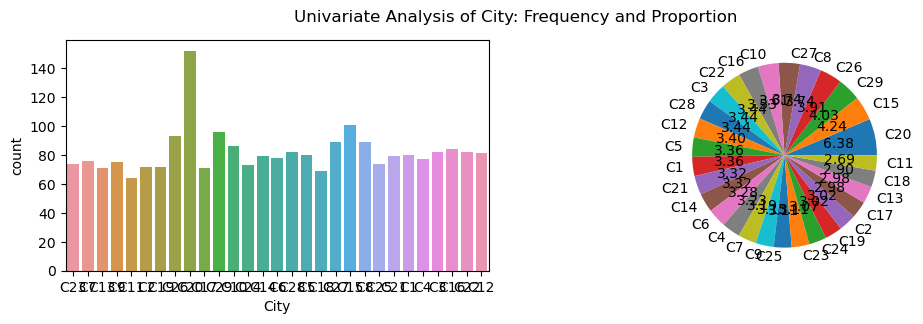

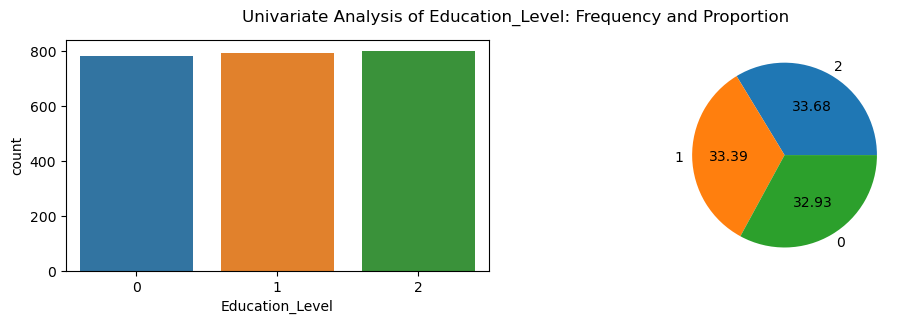

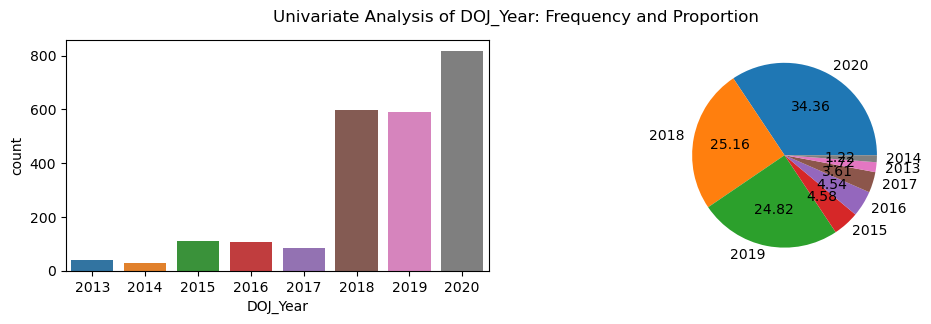

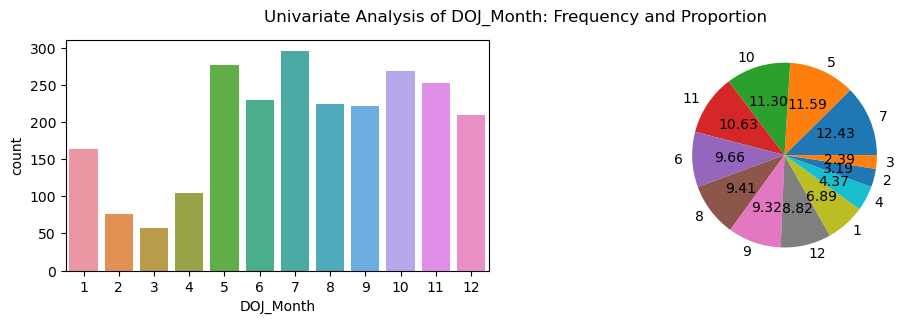

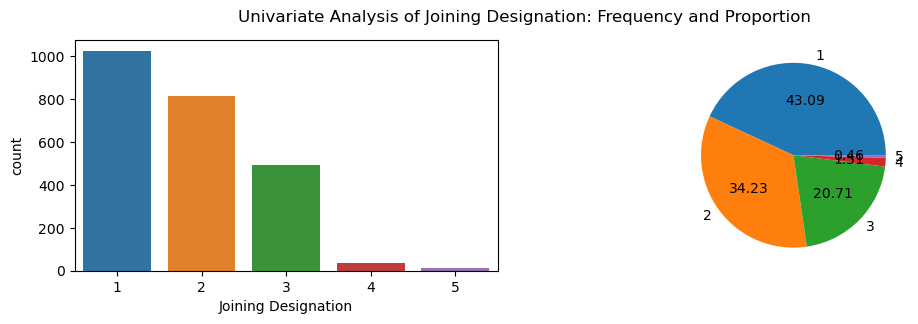

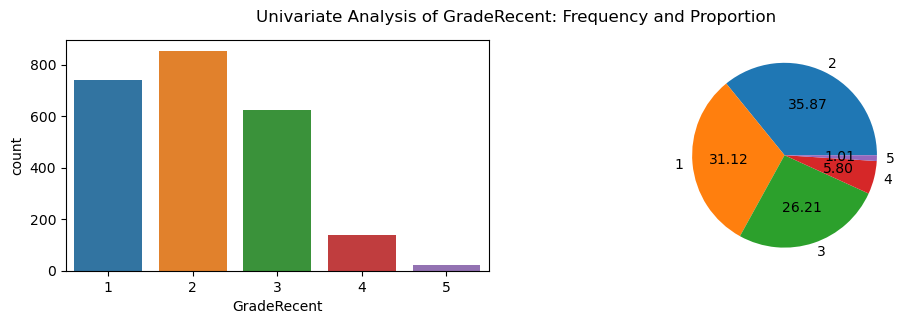

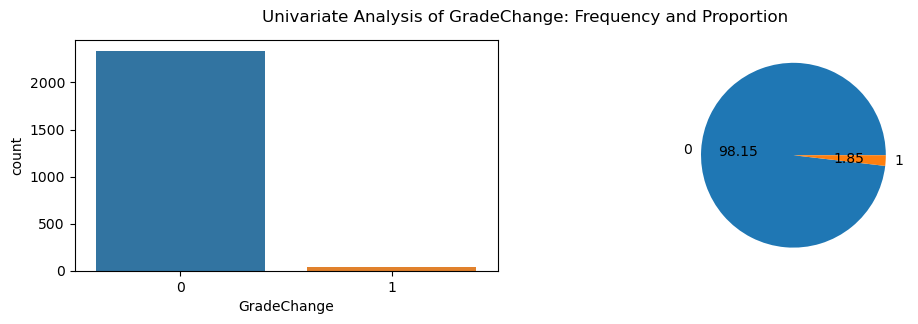

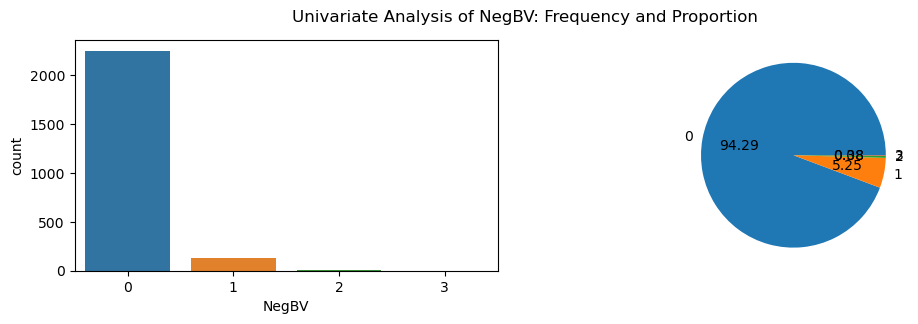

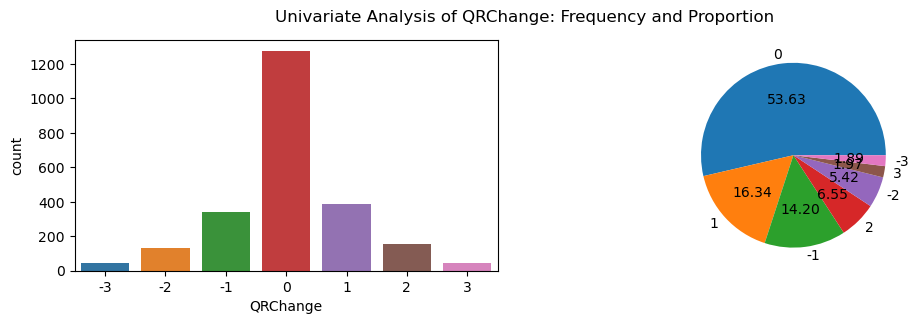

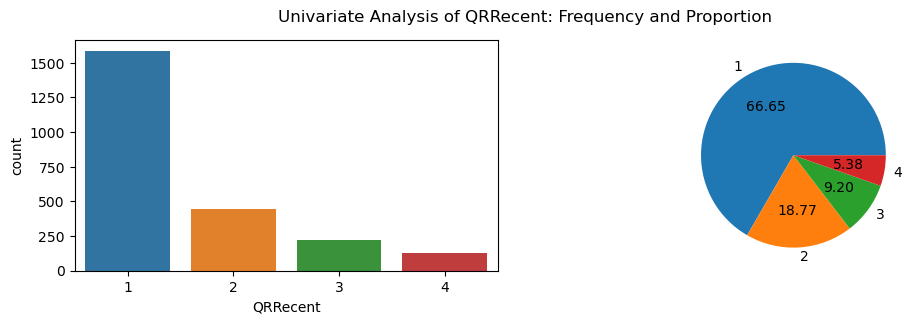

In [130]:
# Categorical Features
for feature in cat_features:
    plt.figure(figsize=(12,3))
    plt.suptitle('Univariate Analysis of ' + feature + ": Frequency and Proportion")
    plt.subplot(1,2,1)
    sns.countplot(data=df_final, x=feature) 
    plt.subplot(1,2,2)
    labels = df_final[feature].value_counts().index
    plt.pie(x=list(df_final[feature].value_counts()), labels=list(labels), autopct="%0.2f")        
    plt.show()

#### Inference:
- Recent Quarterly Rating (QRRecent): Most drivers have a rating of 1, indicating lesser performance.
- Change in Quarterly Rating: Typically follows a normal distribution centered at 0, showing that most drivers experience no significant change in their ratings.
- Negative Business Value: Rarely occurs, indicating minimal influence on driver churn prediction.
- Grade Change: Rarely observed and does not significantly affect churn predictions.
- Recent Grading: Over 90% of drivers are graded between 1-3, with grade 1 being the most common.
- Joining Designation: Over 95% of drivers join at grades 1-3, with grade 1 signifying novice drivers.
- Joining Year: The majority of drivers joined after 2018, suggesting business growth and momentum post-2018.
- Education Level: Equally distributed among drivers, indicating no strong correlation with churn.
- Gender Distribution: Maintains a 60/40 ratio, with Gender 0 being predominant. Missing gender values can be safely imputed with 0.

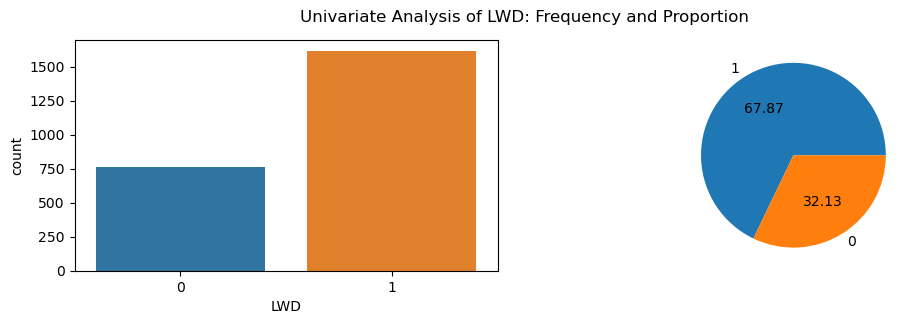

In [114]:
# Target Feature
feature = 'LWD'
plt.figure(figsize=(12,3))
plt.suptitle('Univariate Analysis of ' + feature + ": Frequency and Proportion")
plt.subplot(1,2,1)
sns.countplot(data=df_final, x=feature) 
plt.subplot(1,2,2)
labels = df_final[feature].value_counts().index
plt.pie(x=list(df_final[feature].value_counts()), labels=list(labels), autopct="%0.2f")        
plt.show()

#### Inference:
- Heavily unbalanced dataset with churned drivers 68% and loyal drivers 32%

## Bivariate Analysis

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


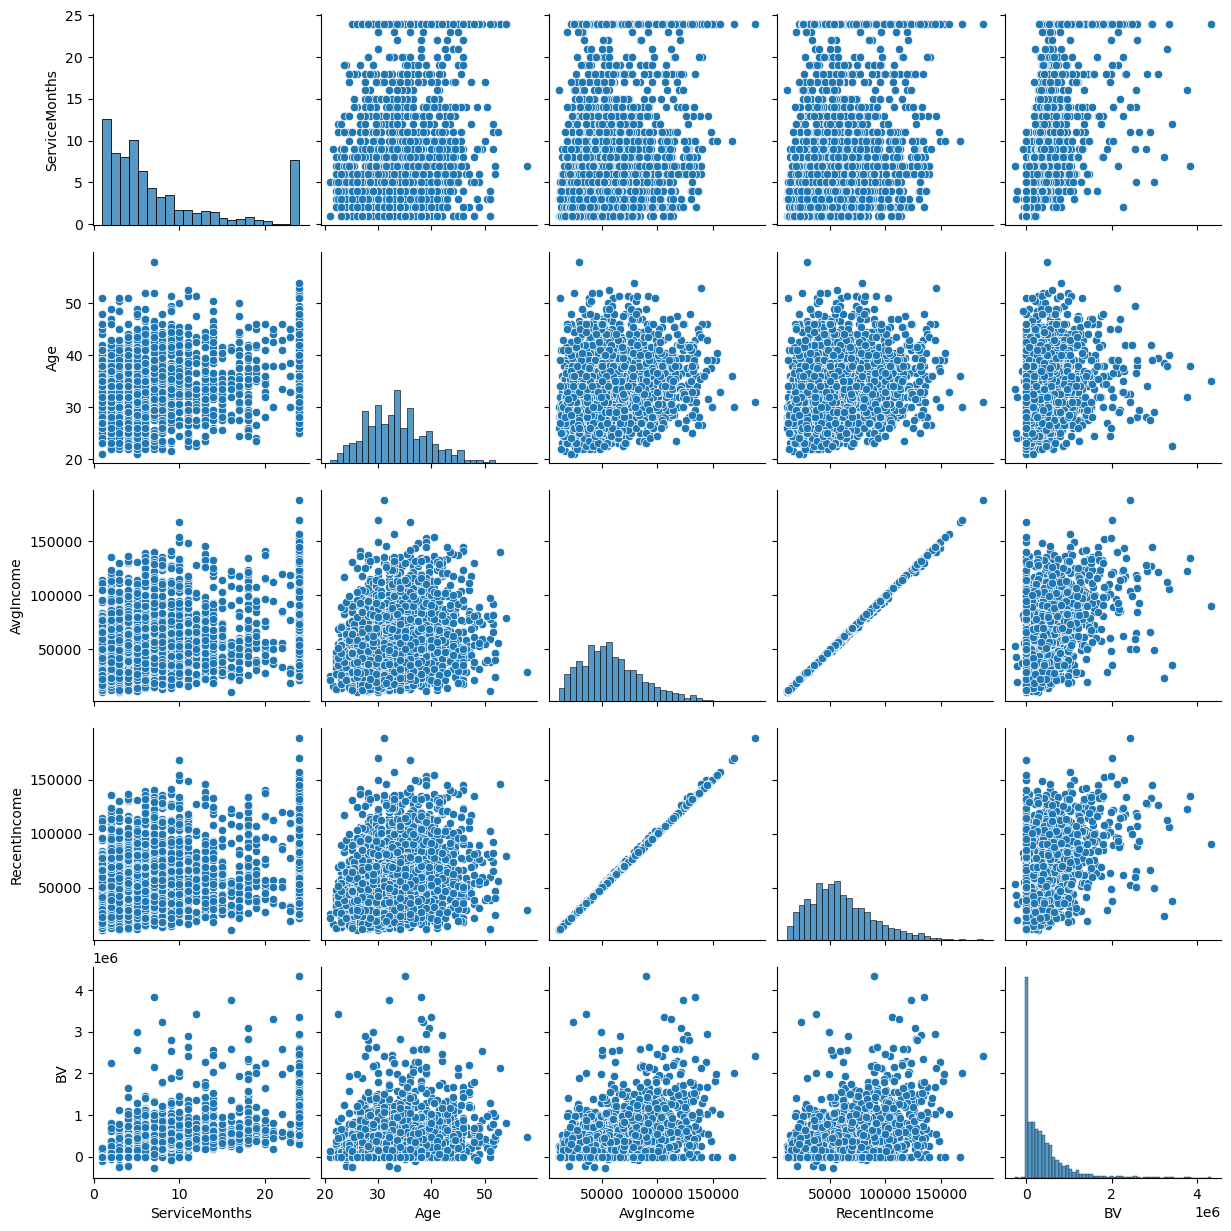

In [115]:
# Numerical Features
sns.pairplot(df_final[num_features])

#### Inference:
- AvgIncome and RecentIncome are highly correlated, seems to be a redundant feature

In [ ]:
#Numerical Features vs Target
for feature in num_features:
    plt.figure(figsize=(12,3))
    plt.suptitle('Univariate Analysis of ' + feature + ": Distribution and Box Plot")
    plt.subplot(1,2,1)
    sns.boxplot(data=raw_df, y= feature, x='LWD')
    plt.subplot(1,2,2)
    sns.boxplot(data = df_final, y = feature)
    plt.xlabel(feature)
    

In [124]:
#Categorical Features vs Target
def TargetVsFeaturePlot(df, feature1, feature2=None):
    plt.figure(figsize=(12,3))
    #plt.suptitle('Univariate Analysis of ' + feature + ": Frequency and Proportion")
    if feature2 is None:
        sns.countplot(data = df, x = feature1, hue='LWD')
        plt.title("LWD Vs " + feature1) 
        plt.show()
    else:
        plt.subplot(1,2,1)
        sns.countplot(data = df, x = feature1, hue='LWD')
        plt.title("LWD Vs " + feature1)
        plt.subplot(1,2,2)
        labels = df_final[feature].value_counts().index
        sns.countplot(data = df, x = feature2, hue='LWD')    
        plt.title("LWD Vs " + feature2)
        plt.show()

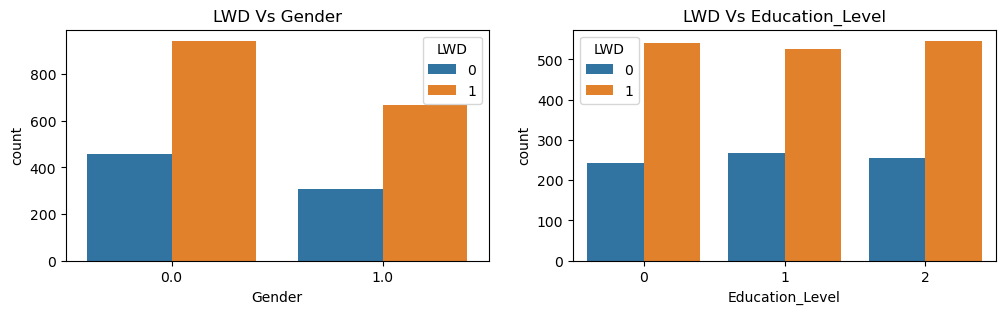

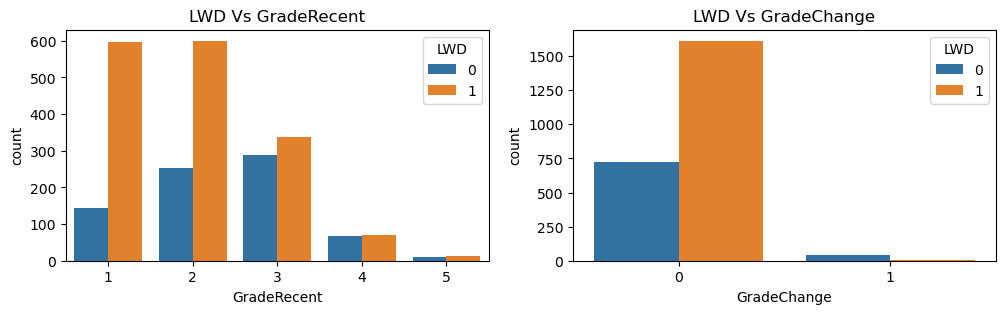

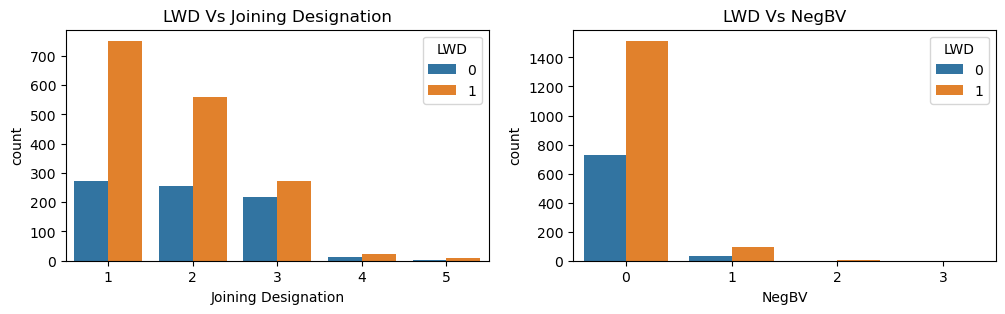

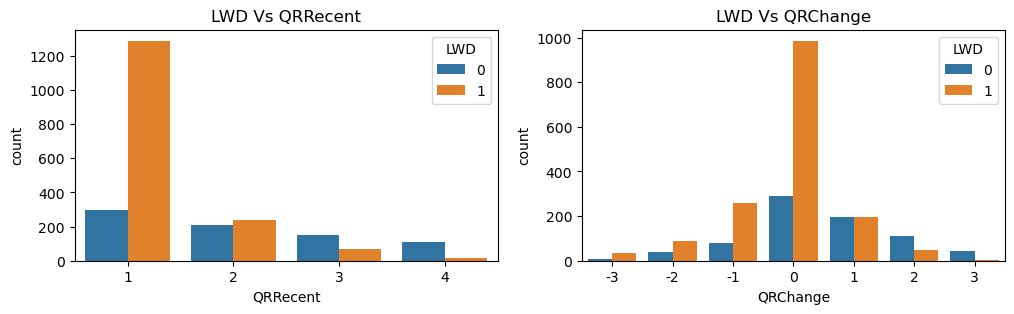

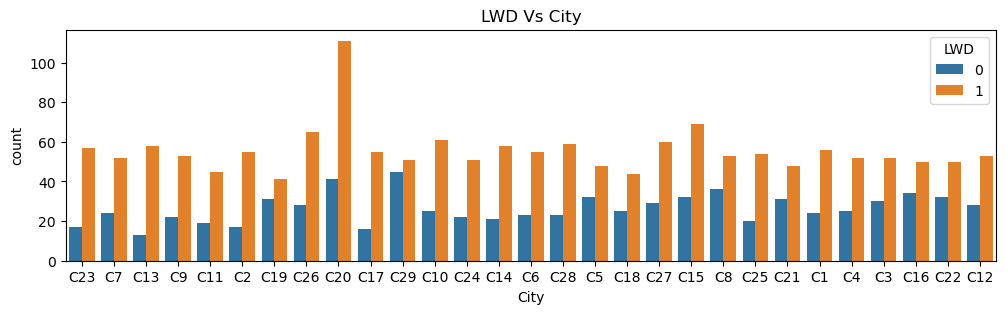

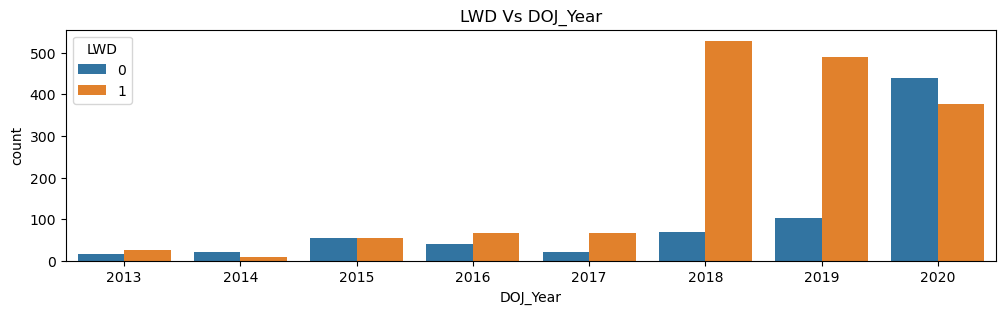

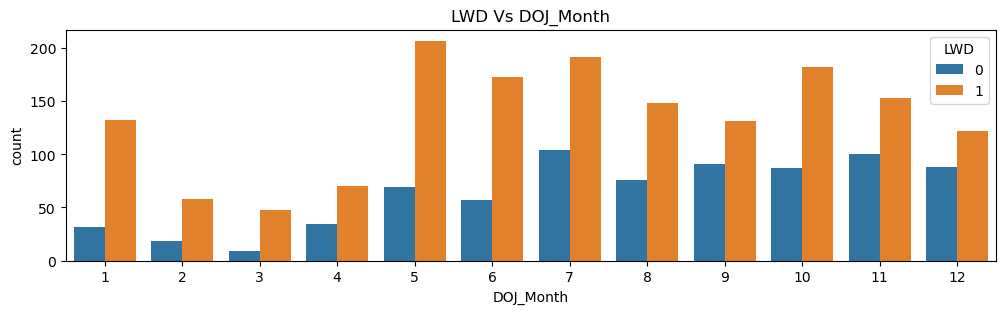

In [131]:
TargetVsFeaturePlot(df_final, 'Gender', 'Education_Level')
TargetVsFeaturePlot(df_final, 'GradeRecent', 'GradeChange')
TargetVsFeaturePlot(df_final, 'Joining Designation', 'NegBV')
TargetVsFeaturePlot(df_final, 'QRRecent', 'QRChange')
TargetVsFeaturePlot(df_final, 'City')
TargetVsFeaturePlot(df_final, 'DOJ_Year')
TargetVsFeaturePlot(df_final, 'DOJ_Month')

#### Inference:
- Gender and education levels are having equal likelihood of churning
- Drivers with grades 1 and 2 are highly likely to churn, while those with grades 3-5 are very unlikely to churn
- Drivers with joining designations of 1 and 2 tend to churn more frequently
- Drivers with a large number of negative business values are highly likely to churn
- Recent Quarterly Rating: Drivers with a recent quarterly rating of 1 are very highly likely to churn
- Change in Quarterly Rating: Drivers with a positive change in their quarterly rating are very unlikely to churn
- Drivers who joined in 2020 are very unlikely to churn
- Drivers from city C20 are highly likely to churn, while those from city C29 are less likely to churn

## Multivariate Analysis

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


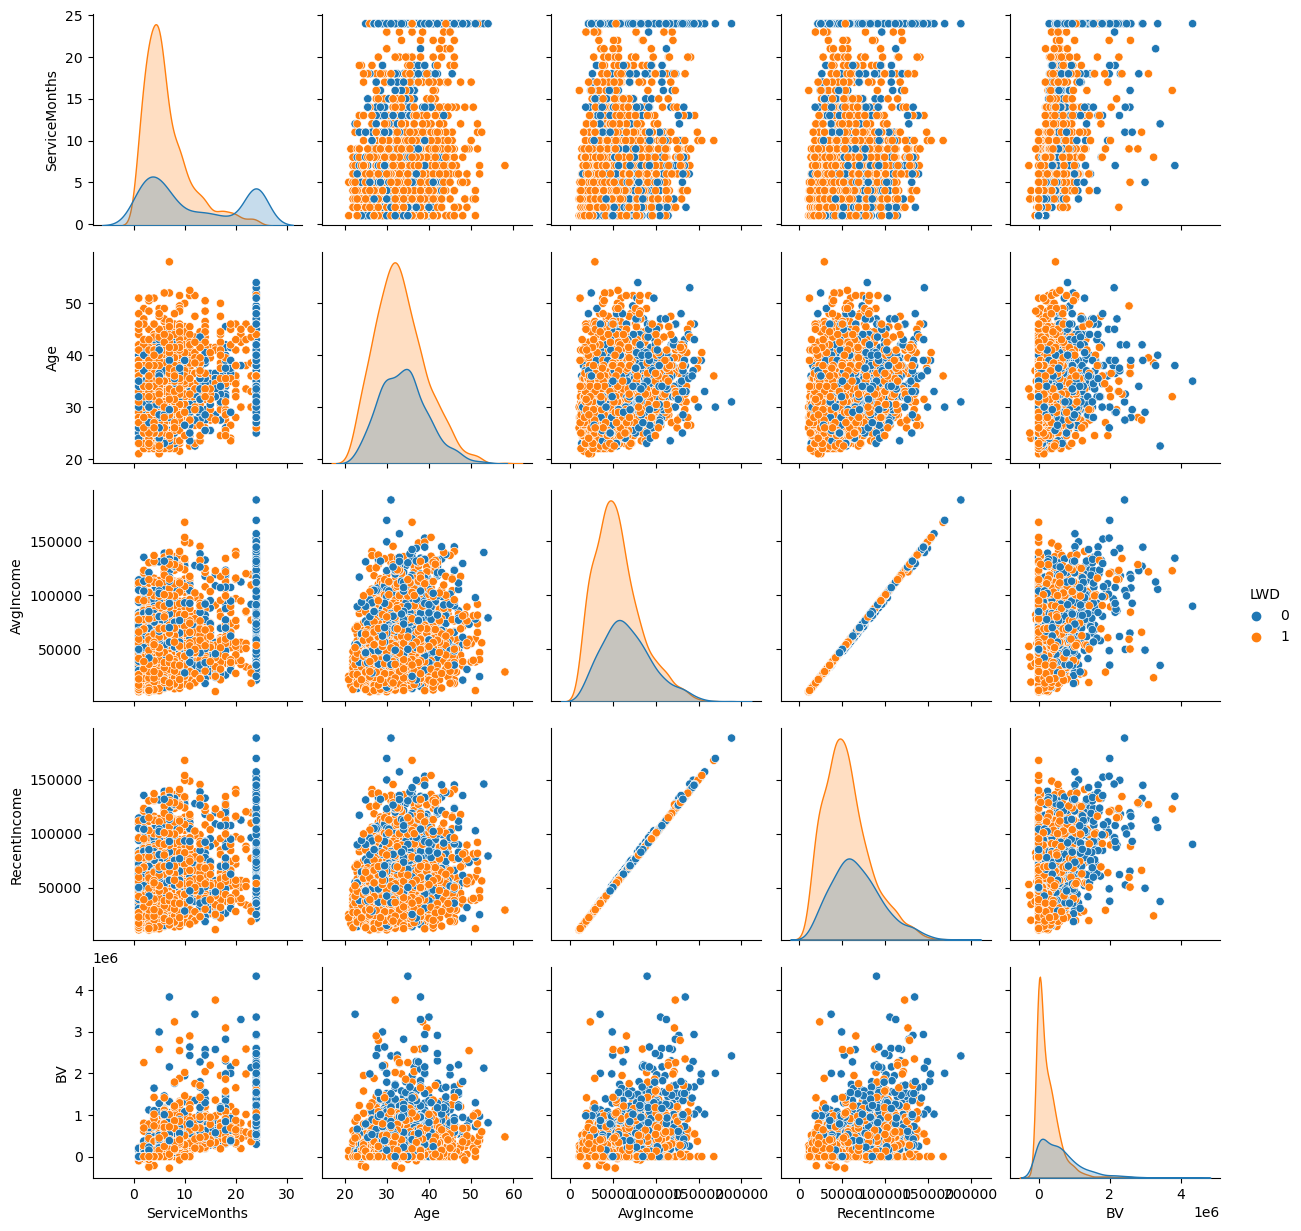

In [116]:
sns.pairplot(df_final[num_features+['LWD']], hue='LWD')

#### Inference:
- Drivers with longer service durations are less likely to churn.
- Drivers contributing less business value are highly likely to churn.
- Drivers earning below-average income are highly likely to churn.

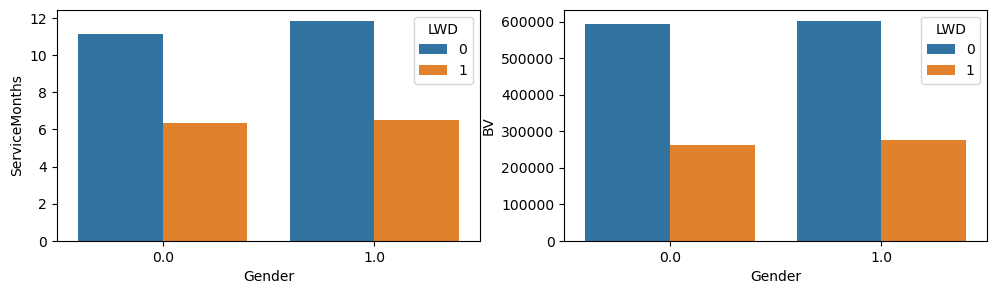

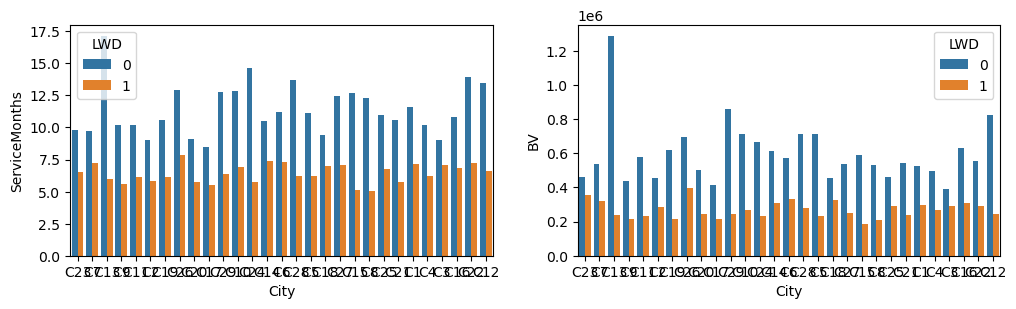

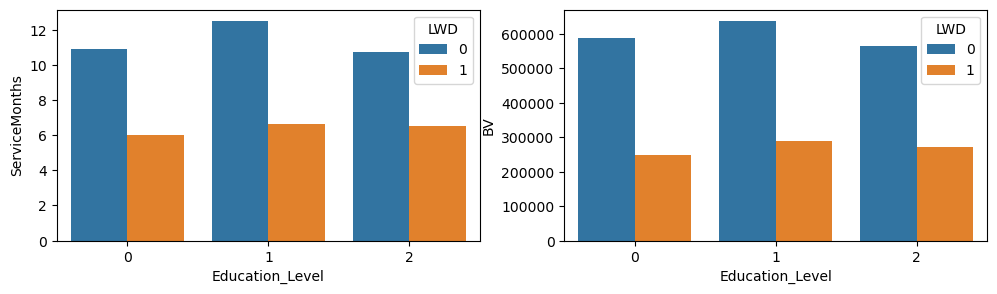

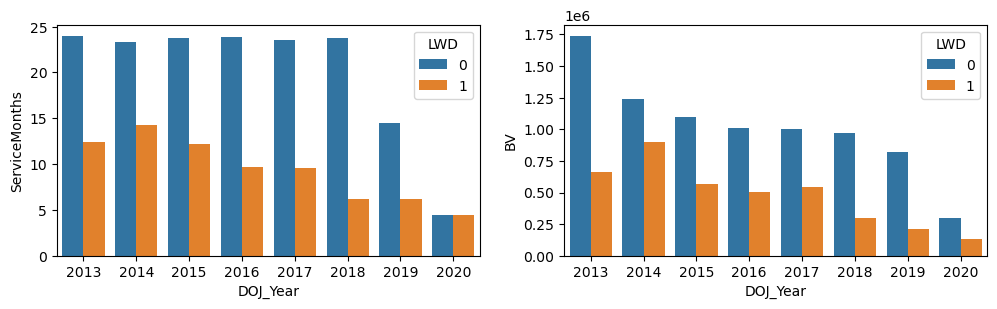

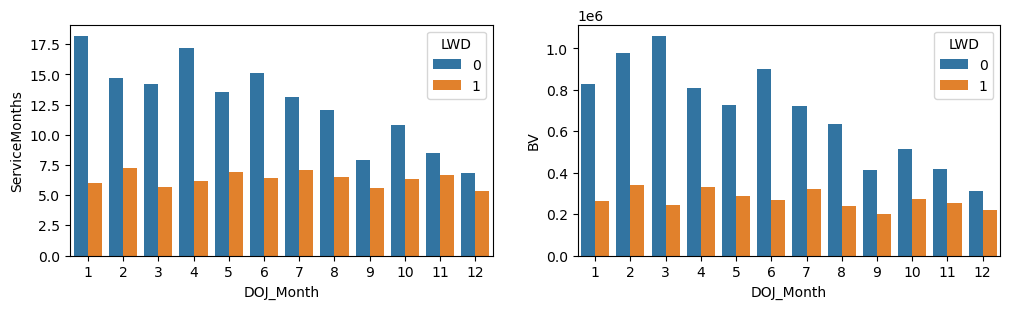

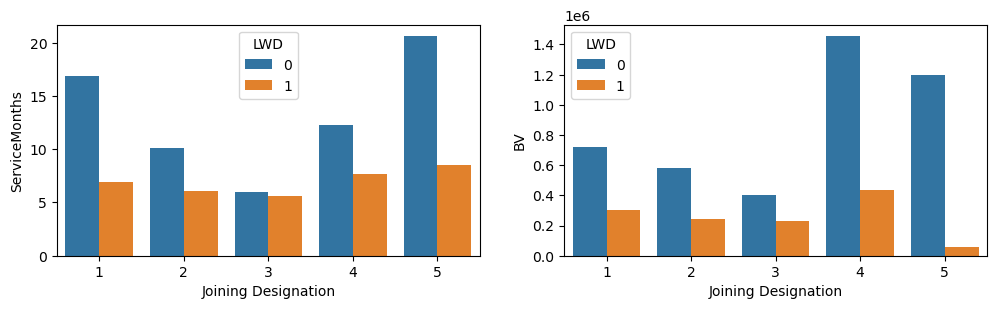

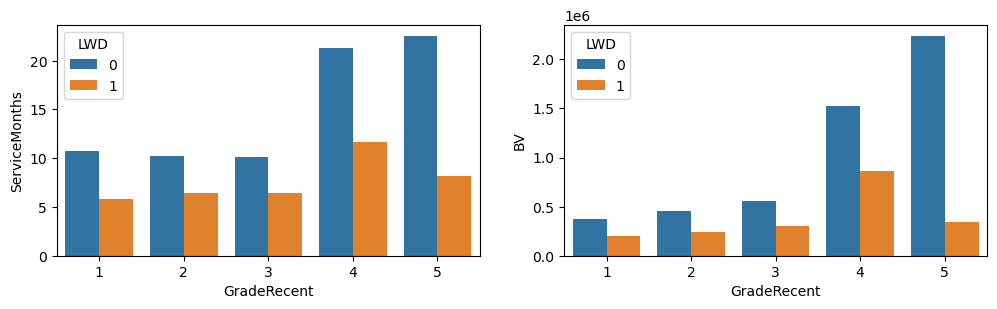

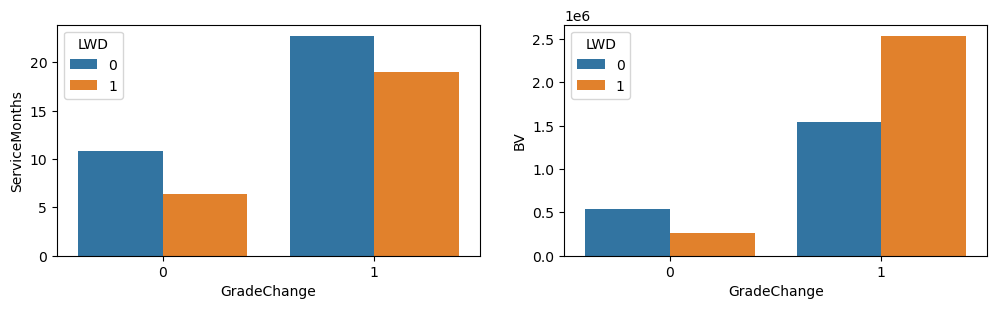

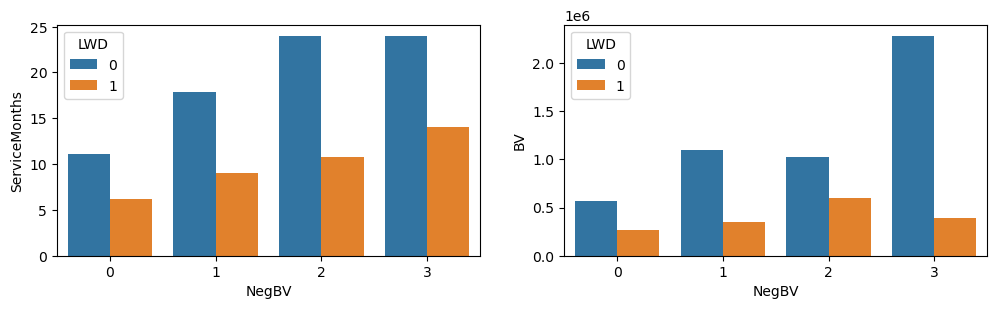

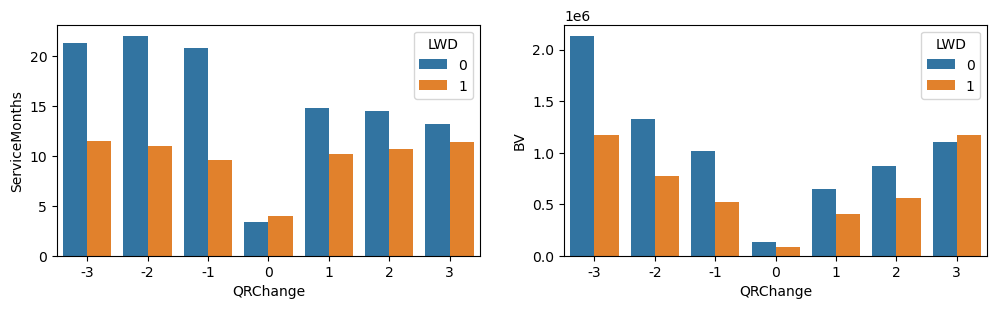

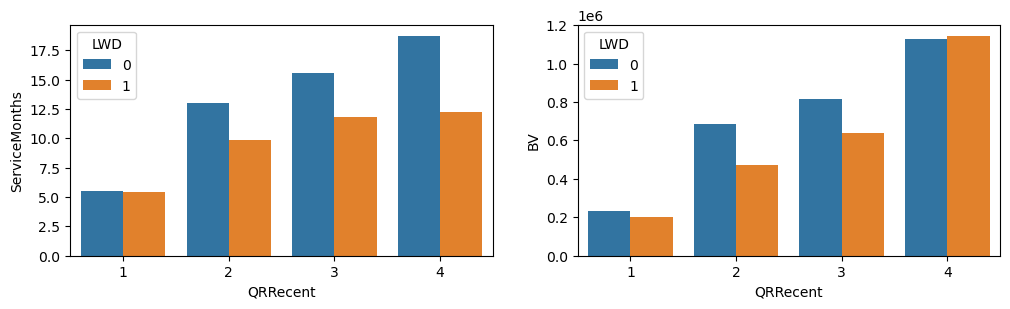

In [135]:
#Categorical Vs Numerical Features
for feature in cat_features:
    plt.figure(figsize=(12,3))
    plt.subplot(1,2,1)
    sns.barplot(data=df_final, x=feature, y='ServiceMonths', hue='LWD', estimator='mean', errorbar=None)
    #plt.title("LWD Vs " + feature1)
    plt.subplot(1,2,2)
    labels = df_final[feature].value_counts().index
    sns.barplot(data=df_final, x=feature, y='BV', hue='LWD', estimator='mean', errorbar=None)
    #plt.title("LWD Vs " + feature2)
    plt.show()

#### Inference:
- Drivers with longer service duration is less likely to churn 
- Interestingly, Highly rated drivers or drivers with increase in quarterly rating churns more
- Drivers with more number of negative business values churn less likely

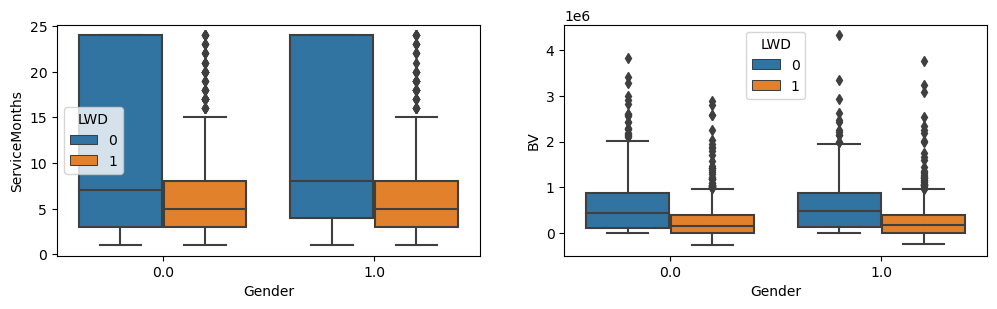

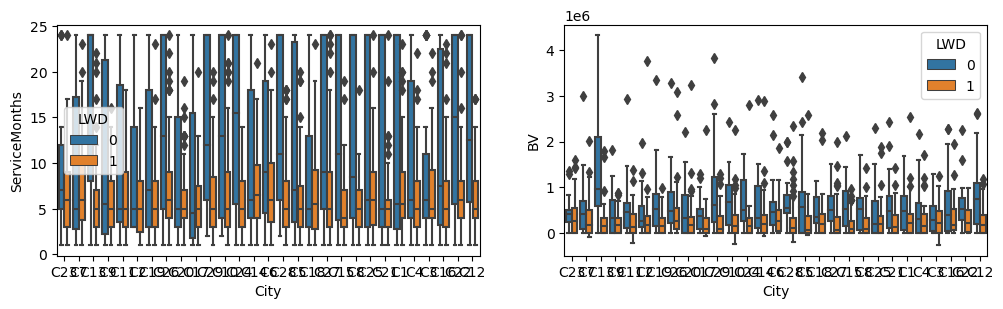

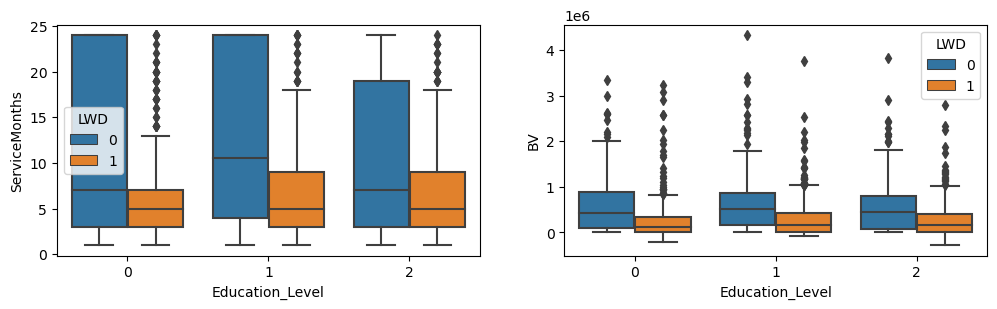

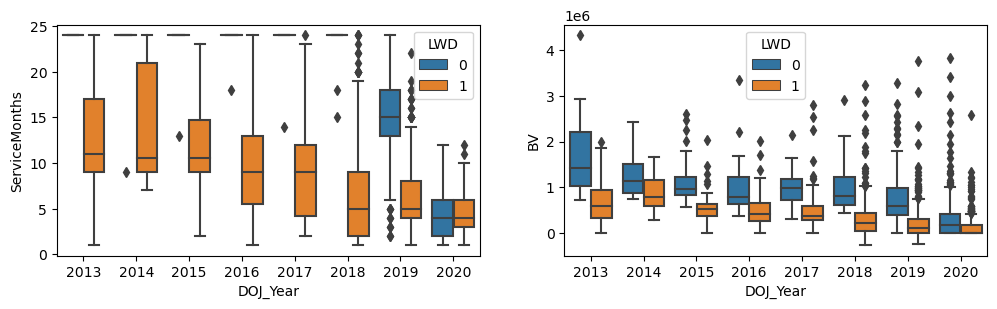

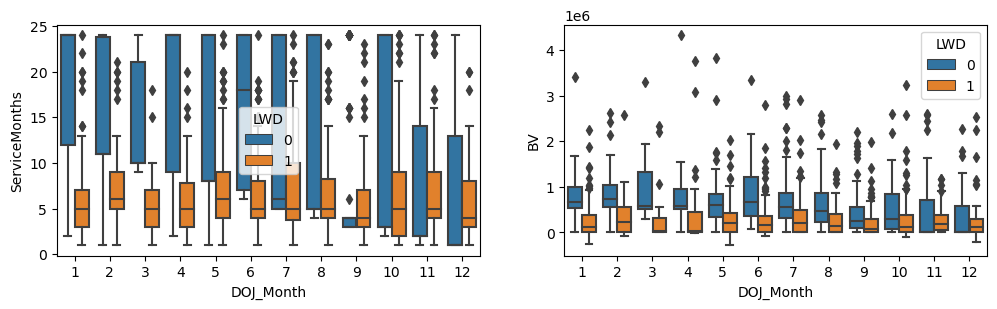

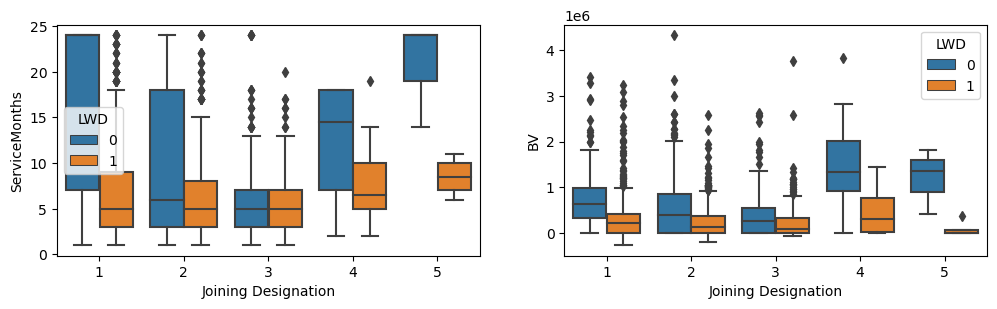

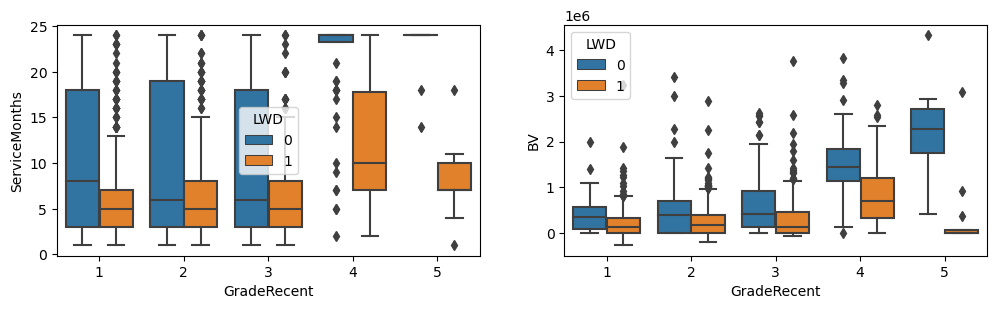

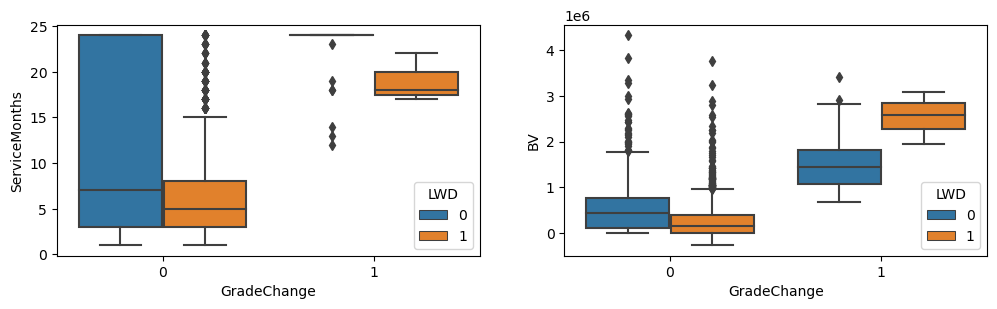

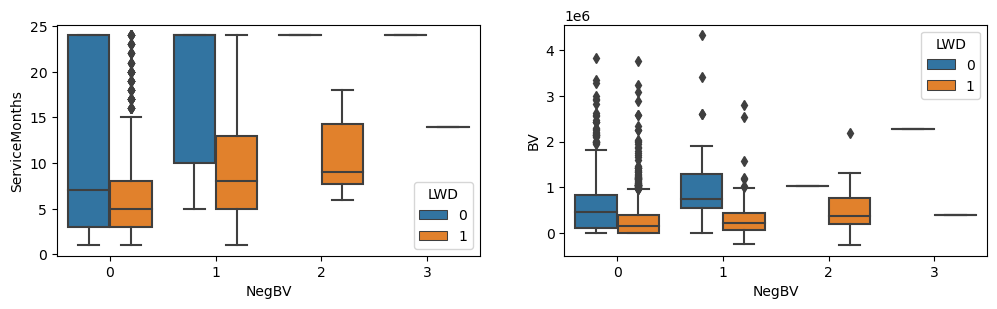

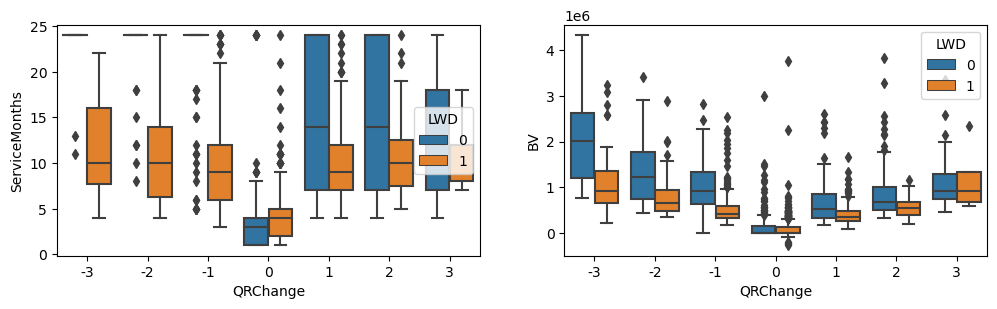

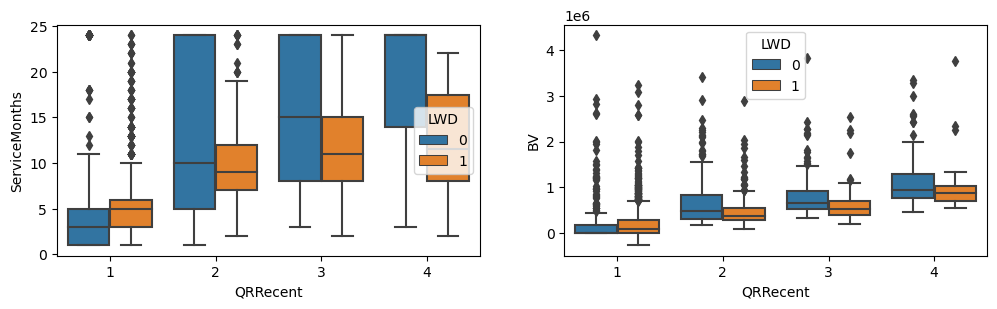

In [137]:
#Categorical Vs Numerical Features
for feature in cat_features:
    plt.figure(figsize=(12,3))
    plt.subplot(1,2,1)
    sns.boxplot(data=df_final, x=feature, y='ServiceMonths', hue='LWD')
    #plt.title("LWD Vs " + feature1)
    plt.subplot(1,2,2)
    labels = df_final[feature].value_counts().index
    sns.boxplot(data=df_final, x=feature, y='BV', hue='LWD')
    #plt.title("LWD Vs " + feature2)
    plt.show()

#### Inference:
- Grade change and higher recent grade shows high possibility for churning
- All the features are severly affected with outliers

# Statistical Analysis
- 2 sample T-Test (Numerical Features)
- Chisquare Test (Categorical Features)

In [151]:
from scipy.stats import ttest_ind 
from scipy.stats import chi2_contingency

In [165]:
def two_sample_test(sample1, sample2, feature, alpha=0.05):
    tstat, pval = ttest_ind(sample1, sample2)
    if pval < alpha:
        print(bold_start + f"Mean {feature} of the churn and not churn drivers are significantly different" + bold_end)
    else:
        print(f"Mean {feature} of the churn and not churn drivers are not significantly different")

In [166]:
for feature in num_features:
    s1 = df_final[df_final['LWD']==0][feature]
    s2 = df_final[df_final['LWD']==1][feature]
    two_sample_test(s1, s2, feature)

Mean ServiceMonths of the churn and not churn drivers are significantly different
Mean Age of the churn and not churn drivers are not significantly different
Mean AvgIncome of the churn and not churn drivers are significantly different
Mean RecentIncome of the churn and not churn drivers are significantly different
Mean BV of the churn and not churn drivers are significantly different


#### Inference:
- Mean Age of drivers doesn't show significant relation to distinguish between churn and non churn drivers, hence the feature may not support model for prediction

In [163]:
def chi_test(sample1, sample2, feature, alpha=0.05):
    ct = pd.crosstab(sample1, sample2)
    tstat, pval, dof, exp = chi2_contingency(ct)
    if pval < alpha:
        print(f"{feature} and churning of drivers are significantly not independent")
    else:
        print(bold_start + f"{feature} and churning of drivers are significantly independent" + bold_end)

In [164]:
for feature in cat_features:
    chi_test(df_final[feature], df_final['LWD'], feature, alpha=0.05)

Gender and churning of drivers are significantly independent
City and churning of drivers are significantly not independent
Education_Level and churning of drivers are significantly independent
DOJ_Year and churning of drivers are significantly not independent
DOJ_Month and churning of drivers are significantly not independent
Joining Designation and churning of drivers are significantly not independent
GradeRecent and churning of drivers are significantly not independent
GradeChange and churning of drivers are significantly not independent
NegBV and churning of drivers are significantly independent
QRChange and churning of drivers are significantly not independent
QRRecent and churning of drivers are significantly not independent


#### Inference:
- Gender, Education Level and No. of negative business value features doesn't show significant relation with the churning of drivers and it confirms our assumption from EDA

## Kruskal Walis Test

In [225]:
#Average Income vs Recent Income
ks_stat, pval = stats.kstest(df_final['AvgIncome'], df_final['RecentIncome'])
if pval < 0.05:
    print("The distributions of Average income and Recent income are significantly different")
else:
    print(bold_start + "The distributions of Average income and Recent income are not significantly different" + bold_end)

The distributions of Average income and Recent income are not significantly different


#### Inference:
- Since the distribution of Average income and Recent income features are similar, including both features add redundancy

## Normality Test

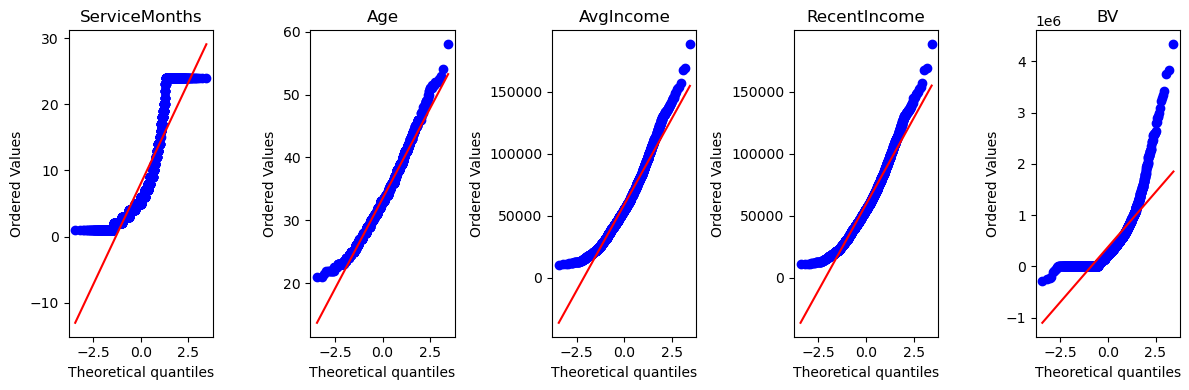

In [195]:
cnt = 1
plt.figure(figsize=(12,4))
for feature in num_features:
    plt.subplot(1,5,cnt)
    stats.probplot(df_final[feature], dist="norm", plot=plt)
    plt.title(feature)
    cnt += 1
plt.tight_layout()
plt.show()

In [198]:
def shapiro_test(data, feature, alpha=0.05):
    w_stat, pval = stats.shapiro(data)
    if pval < alpha:
        print(f"{feature} doesn't follow normal distribution")
    else:
        print(bold_start + f"{feature} follows normal distribution" + bold_end)

In [199]:
for feature in num_features:
    shapiro_test(df_final[feature], feature)

ServiceMonths doesn't follow normal distribution
Age doesn't follow normal distribution
AvgIncome doesn't follow normal distribution
RecentIncome doesn't follow normal distribution
BV doesn't follow normal distribution


#### Inference:
- Both QQPlot and Shapiro wilk test confirms that none of the numerical features follow normal distribution

# Feature Engineering

## Null Treatment

<Axes: xlabel='Gender', ylabel='Count'>

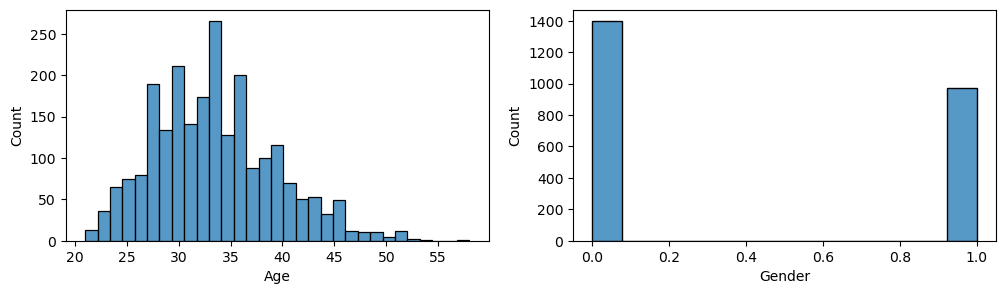

In [169]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.histplot(df_final['Age'])
plt.subplot(1,2,2)
sns.countplot(df_final['Gender'])

In [206]:
print("Mean and Median of Age: ", df_final['Age'].mean().round(2), ",",  df_final['Age'].median())

Mean and Median of Age:  33.47 , 33.0


In [208]:
print("Mode of Gender: ", df_final['Gender'].mode()[0])

Mode of Gender:  0.0


In [182]:
df_final['Age'] = df_final['Age'].fillna(df_final['Age'].median())
df_final['Gender'] = df_final['Gender'].fillna(df_final['Gender'].mode()[0])

In [183]:
df_final.isnull().sum()

ServiceMonths          0
Age                    0
Gender                 0
City                   0
Education_Level        0
AvgIncome              0
RecentIncome           0
DOJ_Year               0
DOJ_Month              0
Joining Designation    0
GradeRecent            0
GradeChange            0
BV                     0
NegBV                  0
QRRecent               0
QRChange               0
LWD                    0
dtype: int64

#### Inference:
- Mean and Median of Age column is very much closer, hence median imputation is performed
- For Gender column, mode imputation is performed

## Outlier Analysis

C:\Users\ADMIN\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ADMIN\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ADMIN\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


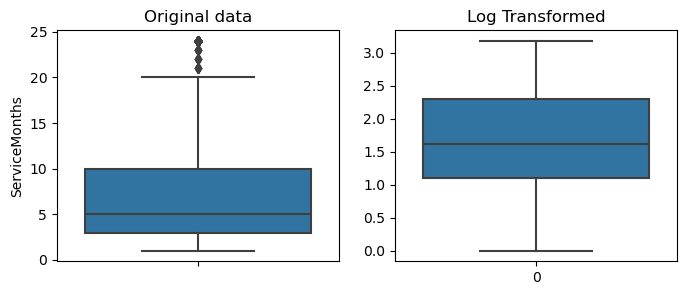

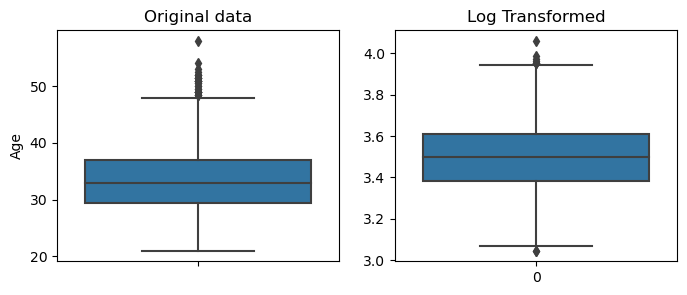

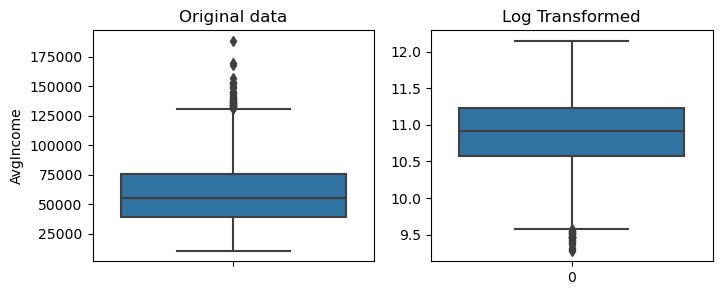

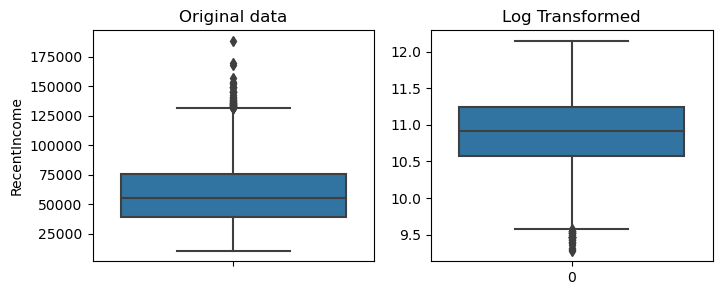

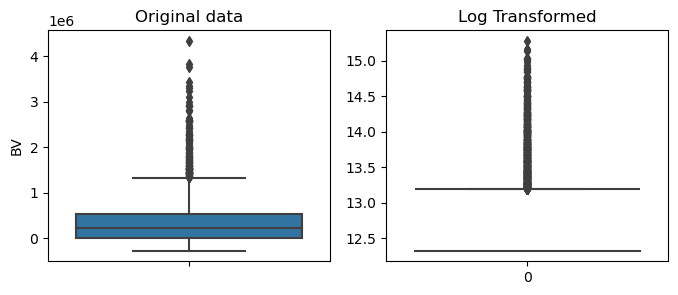

In [243]:
for feature in num_features:
    plt.figure(figsize=(8,3))
    plt.subplot(1,2,1)
    sns.boxplot(data = df_final, y= feature)
    plt.title("Original data")
    plt.subplot(1,2,2)
    sns.boxplot(np.array(np.log(df_final[feature])))
    plt.title("Log Transformed")


#### Inference:
- Log Transform treats outliers perfectly only for ServiceMonths feature
- After modeling, need to check whether outlier treatment required

## Transform Features

In [219]:
ordinal_features = ['Education_Level', 'Joining Designation', 'GradeRecent','GradeChange','NegBV','QRRecent', 'QRChange']
nominal_features = [feature for feature in cat_features if feature not in ordinal_features]
print("Ordinal Features: ", ordinal_features)
print("Nominal Features: ", nominal_features)

ServiceMonths   Age  Gender City  Education_Level  AvgIncome  RecentIncome  \
1              3  28.0     0.0  C23                2    57387.0         57387   
2              2  31.0     0.0   C7                2    67016.0         67016   
4              5  43.0     0.0  C13                2    65603.0         65603   
5              3  29.0     0.0   C9                0    46368.0         46368   
6              5  31.0     1.0  C11                1    78728.0         78728   

   DOJ_Year  DOJ_Month  Joining Designation  GradeRecent  GradeChange  \
1      2018         12                    1            1            0   
2      2020         11                    2            2            0   
4      2019         12                    2            2            0   
5      2019          1                    1            1            0   
6      2020          7                    3            3            0   

         BV  NegBV  QRRecent  QRChange  LWD  
1  571860.0      1         2         0    1  
2       0.0      0         1         0    0  
4  175000.0      0         1         0    1  
5   60180.0      0         1         0    1  
6  632500.0      0         2         1    0

In [252]:
# Ordinal Features
for feature in ordinal_features:
    print(feature, ":", df_final[feature].unique())

Education_Level : [2 0 1]
Joining Designation : [1 2 3 4 5]
GradeRecent : [1 2 3 4 5]
GradeChange : [0 1]
NegBV : [1 0 3 2]
QRRecent : [2 1 3 4]
QRChange : [ 0  1 -3 -1 -2  2  3]


In [254]:
# Nominal Features
for feature in nominal_features:
    print(feature, ":", df_final[feature].nunique())

Gender : 2
City : 29
DOJ_Year : 8
DOJ_Month : 12


In [ ]:
df_final_backup = df_final.copy()

In [278]:
X = df_final.drop("LWD", axis=1)
y = df_final["LWD"]
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [279]:
# Gender One hot encoding
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(xtrain[['Gender']])
xtrain[['Gender0', 'Gender1']] = encoded_data.toarray()
xtrain.drop('Gender', axis=1, inplace = True)

encoded_data = encoder.transform(xtest[['Gender']])
xtest[['Gender0', 'Gender1']] = encoded_data.toarray()
xtest.drop('Gender', axis=1, inplace = True)

In [280]:
# City, DOJ_Year, DOJ_Month are label encoding
for feature in nominal_features:
    if feature != 'Gender':
        freq_enc = xtrain[feature].value_counts(normalize=True)
        xtrain[feature] = xtrain[feature].map(freq_enc)
        xtest[feature] = xtest[feature].map(freq_enc)

In [281]:
xtrain.head()

ServiceMonths   Age      City  Education_Level  AvgIncome  RecentIncome  \
2763              9  37.5  0.034814                0    76756.0         76756   
1067              4  40.5  0.033013                2    68596.0         68596   
2375              1  41.0  0.033613                1    15189.0         15189   
2600              9  41.5  0.030012                0    26460.0         26460   
873              18  32.5  0.033013                2   134302.0        134302   

      DOJ_Year  DOJ_Month  Joining Designation  GradeRecent  GradeChange  \
2763  0.337935   0.042017                    3            3            0   
1067  0.045618   0.042017                    1            3            0   
2375  0.256903   0.112245                    1            1            0   
2600  0.043217   0.112245                    2            2            0   
873   0.250300   0.022809                    1            4            0   

                BV  NegBV  QRRecent  QRChange  Gender0  Gender1  
2763  5.594967e+05      0         2         0      0.0      1.0  
1067  4.988525e+05      0         1         0      1.0      0.0  
2375  0.000000e+00      0         1         0      1.0      0.0  
2600  4.725962e+05      0         1        -2      0.0      1.0  
873   2.344274e+06      0         4         3      0.0      1.0

In [282]:
xtest.head()

ServiceMonths   Age      City  Education_Level  AvgIncome  RecentIncome  \
1663              5  36.0  0.034814                2    59481.0         59481   
1264              5  27.0  0.030612                2    77369.0         77369   
1618              2  29.0  0.030612                1    56985.0         56985   
2351              4  33.0  0.034814                2    31124.0         31124   
1300              6  35.0  0.030612                2    39823.0         39823   

      DOJ_Year  DOJ_Month  Joining Designation  GradeRecent  GradeChange  \
1663  0.250300   0.106242                    2            2            0   
1264  0.045618   0.042017                    1            3            0   
1618  0.337935   0.106242                    2            2            0   
2351  0.250300   0.120648                    1            1            0   
1300  0.250300   0.106242                    1            1            0   

            BV  NegBV  QRRecent  QRChange  Gender0  Gender1  
1663       0.0      0         1         0      1.0      0.0  
1264  361327.5      1         1         0      0.0      1.0  
1618       0.0      0         1         0      1.0      0.0  
2351       0.0      0         1         0      1.0      0.0  
1300  175000.0      0         1         0      1.0      0.0

#### Inference:
- Though categorical encoding not required for decision tree models, the implementation of the same through sklearn library requires it
- Ordinal features in the dataset are already in the order, hence doesn't need any transformation
- Gender exhibits low cardinality, hence one hot encoding is performed
- Other nominal features are frequency encoded

# Models: Logistic Regression

In [ ]:
def performance(ytrue, ypred):
    print(classification_report(ytrue, ypred))
    cm = confusion_matrix(ytrue, ypred)
    disp = ConfusionMatrixDisplay(cm, display_labels=['Not Chunk', 'Chunk'])
    disp.plot(cmap='Blues')
    plt.show()

In [363]:
def plot_roc(ytrue, ypred_prob):
    fpr, tpr, thresholds = roc_curve(ytrue, ypred_prob)
    plt.plot(fpr, tpr, label='ROC Curve (Area: ' + str(auc(fpr, tpr).round(2)) + ')' )
    plt.plot([0, 1], [0, 1], 'k--', label='Average')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    return fpr, tpr, thresholds

In [364]:
def plot_prc(ytrue, ypred_prob, label):
    precision, recall, thresholds = precision_recall_curve(ytrue, ypred_prob, pos_label=label)
    no_skill = len(ytrue[ytrue==label]) / len(ytrue)
    plt.plot(recall, precision, label='Precision Recall Curve (Area: ' + str(auc(recall, precision).round(2)) + ')' )
    plt.plot([0, 1], [no_skill, no_skill], 'k--', label='Average')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    return precision, recall, thresholds

In [382]:
def feature_score(names, scores):
    feature_imp = [(names[i], scores[i]) for i in range(len(names))]
    feature_imp = sorted(feature_imp, key = lambda x: x[1], reverse=True)

    feature_names = [x[0] for x in feature_imp]
    feature_imp_score = [x[1] for x in feature_imp]
    plt.plot(feature_names, feature_imp_score, marker='o')
    plt.xticks(rotation=90)
    plt.show()

In [350]:
scaler = RobustScaler()
xtrain_scaled = xtrain.copy()
xtest_scaled = xtest.copy()
xtrain_scaled[num_features] = scaler.fit_transform(xtrain[num_features])
xtest_scaled[num_features] = scaler.fit_transform(xtest[num_features])

In [352]:
logr = LogisticRegression(class_weight='balanced')
logr.fit(xtrain, ytrain)

Training Score: 0.6884753901560624
Test Score: 0.6909090909090909


### Performance Analysis

In [366]:
print("Training Score:", logr.score(xtrain, ytrain))
print("Test Score:",  logr.score(xtest, ytest))

Training Score: 0.6884753901560624
Test Score: 0.6909090909090909


              precision    recall  f1-score   support

           0       0.52      0.56      0.54       233
           1       0.78      0.75      0.77       482

    accuracy                           0.69       715
   macro avg       0.65      0.66      0.65       715
weighted avg       0.70      0.69      0.69       715



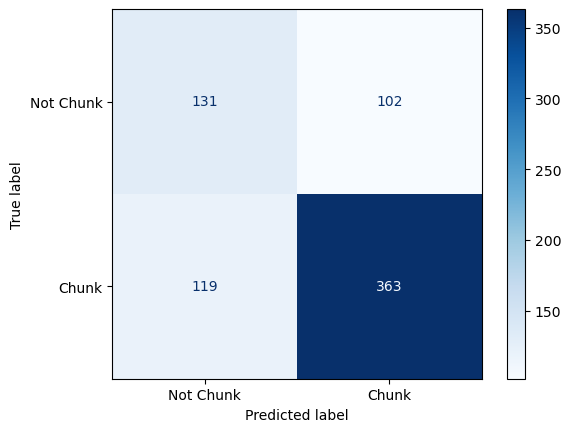

In [359]:
performance(ytest, logr.predict(xtest))

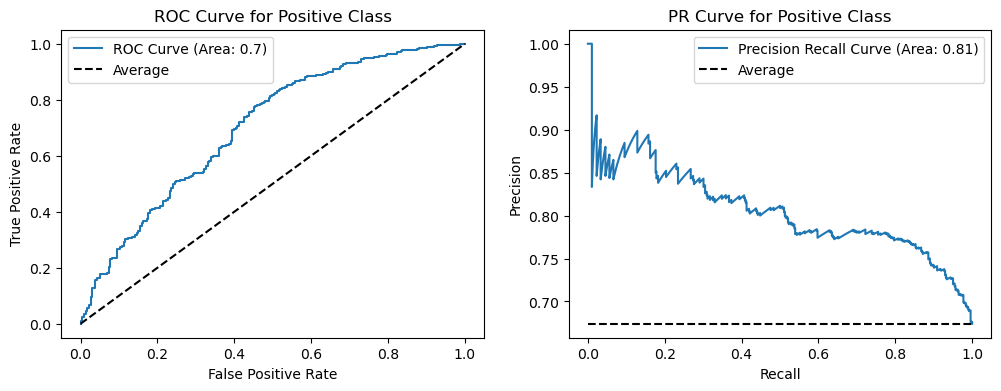

In [391]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ypred_prob = logr.predict_proba(xtest)[:,1]
plot_roc(ytest, ypred_prob)
plt.title("ROC Curve for Positive Class")
plt.subplot(1,2,2)
p, r, th = plot_prc(ytest, ypred_prob, 1)
plt.title("PR Curve for Positive Class")
plt.show()

#### Inference:
- Logistic regression model exhibits poor performance in the classification
- Achieves 70% accuracy, with an average precision and recall of ~50%
- It indicates the non linear relationship between the features and target
- Precision and Recall for the prediction performance of chunking drivers is high
- ROC curve indicates the model performance is just over the performance of mean model
- AUC ROC = 0.7 indicates moderate discrimination ability and AUC PR = 0.81 indicates good performance

# Models: Decision Tree

In [385]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(xtrain, ytrain)
print("Training Score:", model_dt.score(xtrain, ytrain))
print("Test Score:",  model_dt.score(xtest, ytest))

Training Score: 1.0
Test Score: 0.8909090909090909


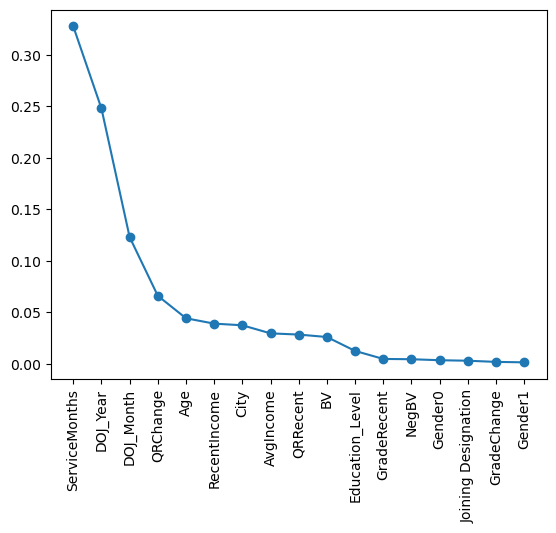

In [386]:
feature_score(model_dt.feature_names_in_, model_dt.feature_importances_)

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       233
           1       0.93      0.91      0.92       482

    accuracy                           0.89       715
   macro avg       0.87      0.88      0.88       715
weighted avg       0.89      0.89      0.89       715



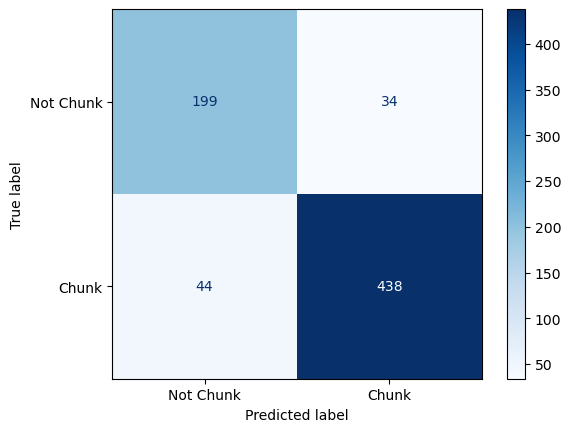

In [387]:
performance(ytest, model_dt.predict(xtest))

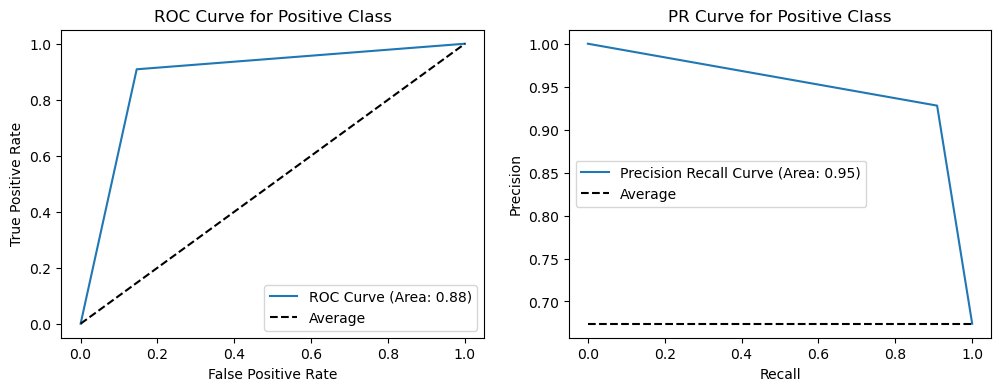

In [392]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ypred_prob = model_dt.predict_proba(xtest)[:,1]
plot_roc(ytest, ypred_prob)
plt.title("ROC Curve for Positive Class")
plt.subplot(1,2,2)
p, r, th = plot_prc(ytest, ypred_prob, 1)
plt.title("PR Curve for Positive Class")
plt.show()

#### Inference:
- Service Months, Date of Joining and Change in Quarterly rating are the features highly influenced the prediction
- Decision tree achieves 100% training accuracy but 89% test accuracy, indicating overfitting
- Precision, recall, FPR, and FNR are significantly better than the linear model.
- AUC ROC = 0.88 and AUC PR = 0.95 exhibits better performance

## Balancing Classes

In [394]:
model_dt = DecisionTreeClassifier(class_weight = 'balanced', random_state=42)
model_dt.fit(xtrain, ytrain)
print("Training Score:", model_dt.score(xtrain, ytrain))
print("Test Score:",  model_dt.score(xtest, ytest))

Training Score: 1.0
Test Score: 0.8839160839160839


              precision    recall  f1-score   support

           0       0.83      0.81      0.82       233
           1       0.91      0.92      0.91       482

    accuracy                           0.88       715
   macro avg       0.87      0.87      0.87       715
weighted avg       0.88      0.88      0.88       715



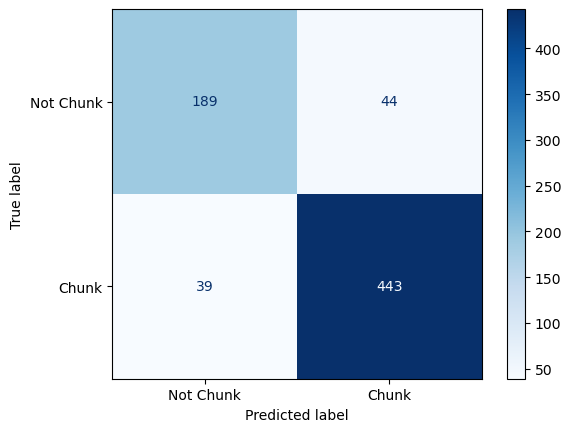

In [395]:
performance(ytest, model_dt.predict(xtest))

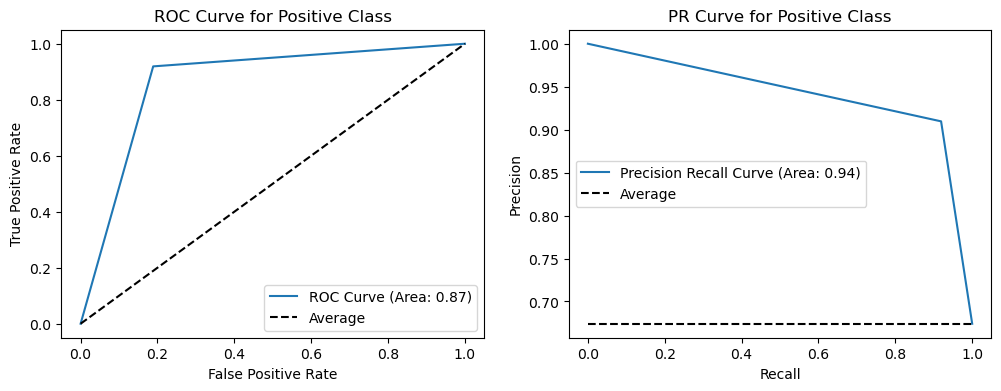

In [396]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ypred_prob = model_dt.predict_proba(xtest)[:,1]
plot_roc(ytest, ypred_prob)
plt.title("ROC Curve for Positive Class")
plt.subplot(1,2,2)
p, r, th = plot_prc(ytest, ypred_prob, 1)
plt.title("PR Curve for Positive Class")
plt.show()

#### Inference:
- Adding class weightage slightly reduces the performance by ~1% 

In [397]:
## Hyperparameter Tuning
params = {"max_depth": [3,5,7],
         "min_samples_split": [5, 10, 15],
          "ccp_alpha": [0.01, 0.05, 0.1]
         }

In [398]:
model_dt = DecisionTreeClassifier(random_state=42)
grid_res = RandomizedSearchCV(estimator=model_dt, param_distributions= params, cv = 3, scoring='accuracy')

In [399]:
grid_res.fit(xtrain, ytrain)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'ccp_alpha': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'min_samples_split': [5, 10, 15]},
                   scoring='accuracy')

In [400]:
best_model = grid_res.best_estimator_

In [401]:
best_model.score(xtest, ytest)

0.8615384615384616

              precision    recall  f1-score   support

           0       0.84      0.71      0.77       233
           1       0.87      0.94      0.90       482

    accuracy                           0.86       715
   macro avg       0.86      0.82      0.84       715
weighted avg       0.86      0.86      0.86       715



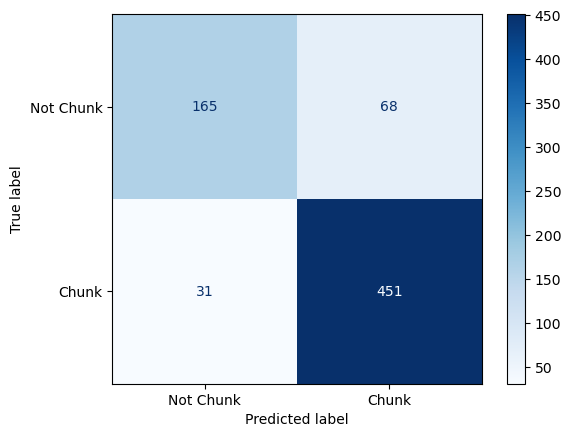

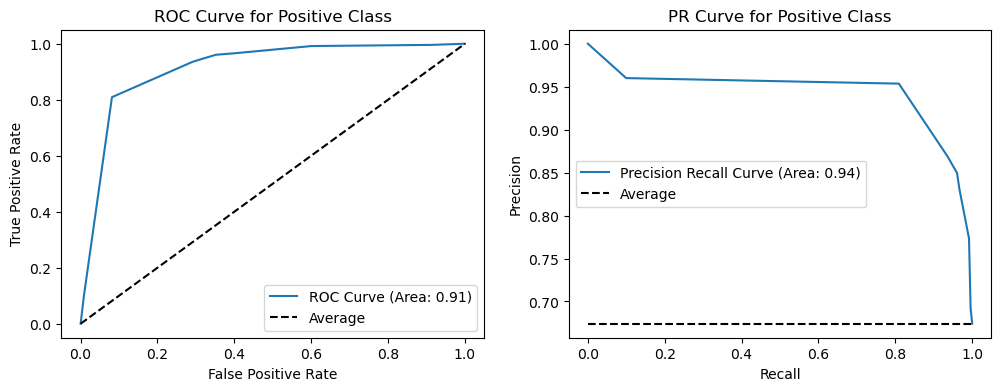

In [402]:
performance(ytest, best_model.predict(xtest))
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ypred_prob = best_model.predict_proba(xtest)[:,1]
plot_roc(ytest, ypred_prob)
plt.title("ROC Curve for Positive Class")
plt.subplot(1,2,2)
p, r, th = plot_prc(ytest, ypred_prob, 1)
plt.title("PR Curve for Positive Class")
plt.show()

#### Inference:
- Addressing the Class imbalance and hyperparameter tuning doesn't improve the score much
- The best estimator from tuning significantly reduces FNR but increases FPR
- AUC ROC improves, but AUC Precision-Recall (PR) declines, indicating a trade-off between overall classification performance and precision-recall balance
- Explore ensembling methods to improve performance and balance trade-offs

# Ensemble Models

## Random Forest

In [405]:
rfc = RandomForestClassifier(class_weight='balanced', random_state=42)

In [406]:
rfc.fit(xtrain, ytrain)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [407]:
print("Training Score:", rfc.score(xtrain, ytrain))
print("Test Score:",  rfc.score(xtest, ytest))

Training Score: 1.0
Test Score: 0.8895104895104895


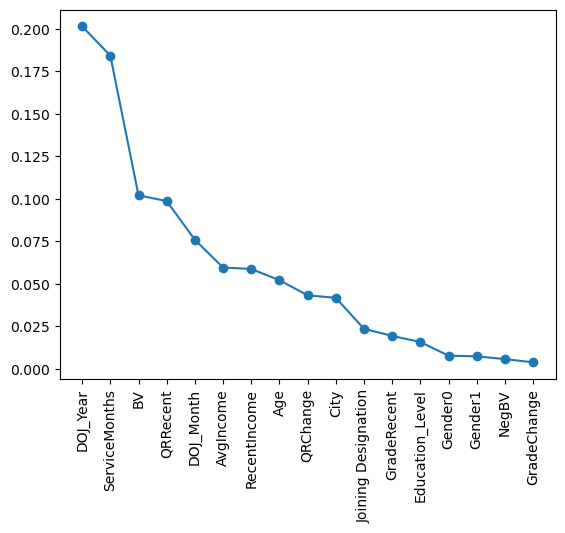

In [408]:
feature_score(rfc.feature_names_in_, rfc.feature_importances_)

              precision    recall  f1-score   support

           0       0.84      0.81      0.83       233
           1       0.91      0.93      0.92       482

    accuracy                           0.89       715
   macro avg       0.88      0.87      0.87       715
weighted avg       0.89      0.89      0.89       715



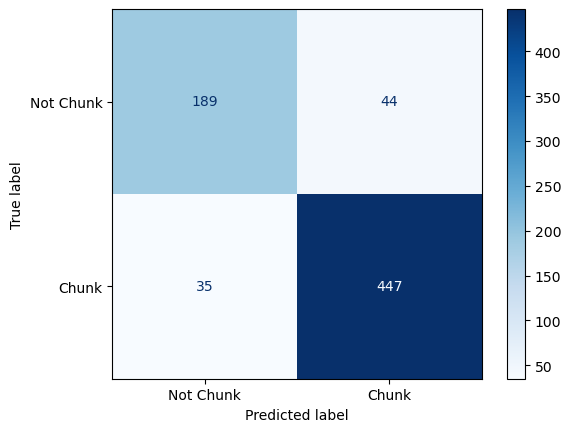

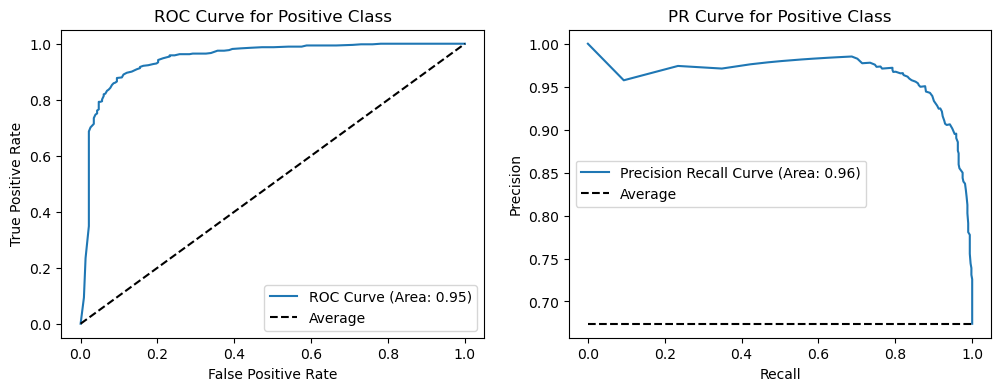

In [403]:
performance(ytest, rfc.predict(xtest))
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ypred_prob = rfc.predict_proba(xtest)[:,1]
plot_roc(ytest, ypred_prob)
plt.title("ROC Curve for Positive Class")
plt.subplot(1,2,2)
p, r, th = plot_prc(ytest, ypred_prob, 1)
plt.title("PR Curve for Positive Class")
plt.show()

#### Inference:
- Service Months, Date of Joining, Average Business value and Recent Quarterly rating are highly influenced the prediction
- Random Forest tree achieves 100% training accuracy but 89% test accuracy, indicating overfitting
- Precision, recall, FPR, and FNR are significantly better than the simple decision tree model.
- AUC ROC = 0.95 and AUC PR = 0.96 increases significantly exhibiting better performance

### Hyperparameter Tuning

In [409]:
params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [410]:
grid_res = RandomizedSearchCV(estimator=rfc, param_distributions= params, cv = 3, scoring='accuracy')

In [411]:
grid_res.fit(xtrain, ytrain)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='accuracy')

In [412]:
best_model = grid_res.best_estimator_
print("Training Score:", best_model.score(xtrain, ytrain))
print("Test Score:",  best_model.score(xtest, ytest))

Training Score: 0.9705882352941176
Test Score: 0.8923076923076924


              precision    recall  f1-score   support

           0       0.80      0.90      0.84       233
           1       0.95      0.89      0.92       482

    accuracy                           0.89       715
   macro avg       0.87      0.89      0.88       715
weighted avg       0.90      0.89      0.89       715



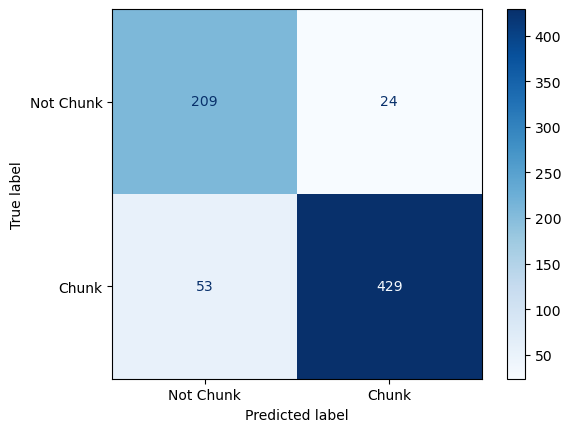

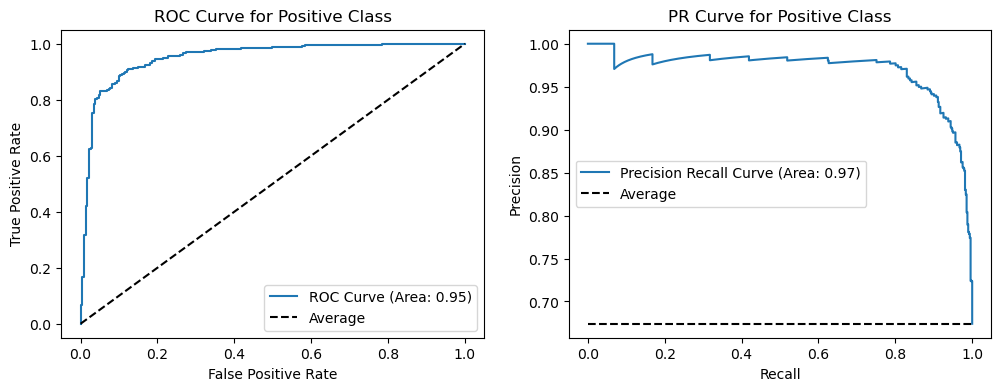

In [415]:
performance(ytest, best_model.predict(xtest))
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ypred_prob = best_model.predict_proba(xtest)[:,1]
plot_roc(ytest, ypred_prob)
plt.title("ROC Curve for Positive Class")
plt.subplot(1,2,2)
p, r, th = plot_prc(ytest, ypred_prob, 1)
plt.title("PR Curve for Positive Class")
plt.show()

#### Inference:
- Overfitting is reduced in the best estimator
- Improvement precision at the cost of recall whereas the AUC PR is improved by 2%
- Also improves the test accuracy by 1%

### Gradient Boosting

In [414]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(xtrain, ytrain)
print("Training Score:", gbc.score(xtrain, ytrain))
print("Test Score:",  gbc.score(xtest, ytest))

Training Score: 0.9483793517406963
Test Score: 0.9188811188811189


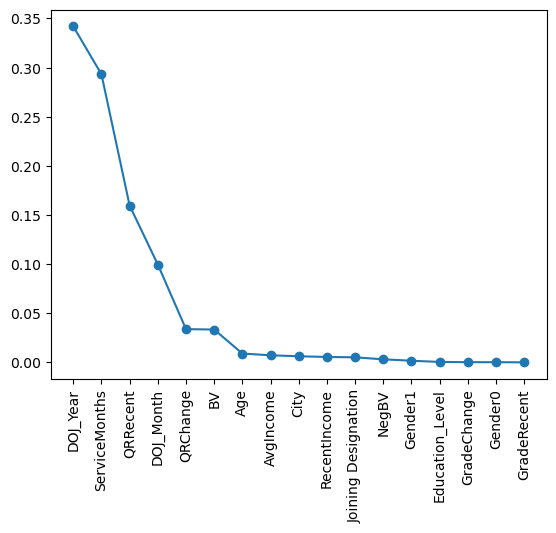

In [416]:
feature_score(gbc.feature_names_in_, gbc.feature_importances_)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       233
           1       0.95      0.93      0.94       482

    accuracy                           0.92       715
   macro avg       0.90      0.91      0.91       715
weighted avg       0.92      0.92      0.92       715



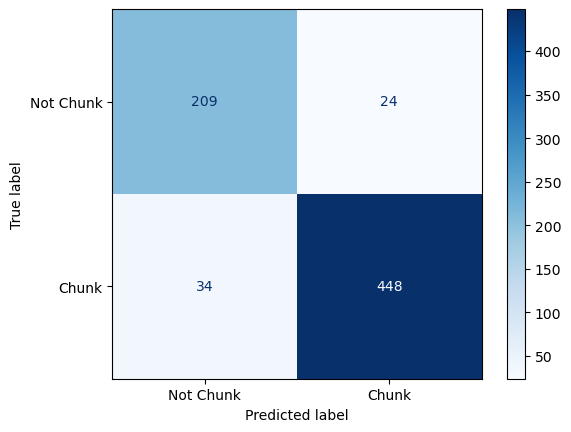

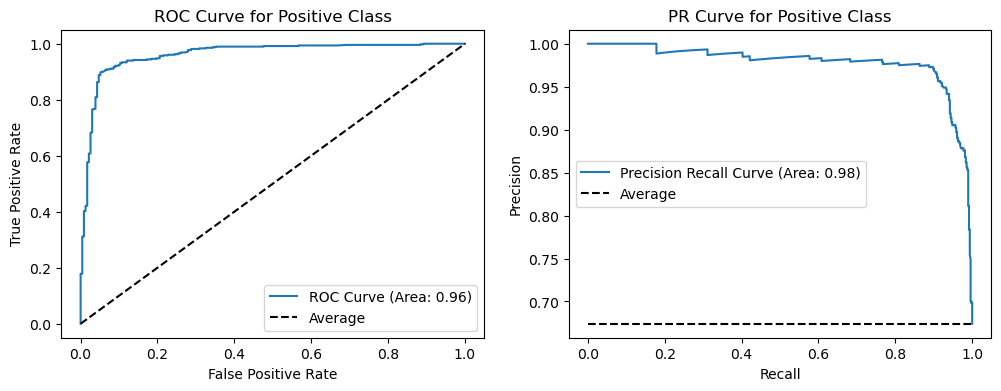

In [417]:
performance(ytest, gbc.predict(xtest))
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ypred_prob = gbc.predict_proba(xtest)[:,1]
plot_roc(ytest, ypred_prob)
plt.title("ROC Curve for Positive Class")
plt.subplot(1,2,2)
p, r, th = plot_prc(ytest, ypred_prob, 1)
plt.title("PR Curve for Positive Class")
plt.show()

#### Inference:
- Service Months, Date of Joining, Recent and Change in Quarterly rating highly influenced the prediction
- Gradient Boosting classifier increases test accuracy by 3% compared to decision tree models and significantly reduces overfitting
- Gradient Boosting outperforms all other classification models with highest accuracy, precision and recall scores
- Gradient Boosting demonstrates outstanding performance with AUC ROC = 0.96 and AUC PR = 0.98, indicating superior discrimination ability and precision-recall balance

### Hyperparameter Tuning

In [418]:
params = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1, 0.2],    # Shrinks contribution of each tree
    'max_depth': [2, 3, 4, 5, 6],                  # Depth of each tree
    'min_samples_split': [2, 5, 10],            # Min samples to split an internal node
    'min_samples_leaf': [1, 2, 4],              # Min samples per leaf
    'subsample': [0.7, 0.8, 0.9, 1.0],          # Fraction of samples used per tree
    'max_features': ['sqrt', 'log2', None]      # Features considered for best split
}

In [419]:
grid_res = RandomizedSearchCV(estimator=gbc, param_distributions= params, cv = 3, scoring='accuracy')
grid_res.fit(xtrain, ytrain)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [2, 3, 4, 5, 6],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   scoring='accuracy')

In [420]:
best_model = grid_res.best_estimator_
print("Training Score:", best_model.score(xtrain, ytrain))
print("Test Score:",  best_model.score(xtest, ytest))

Training Score: 0.9735894357743097
Test Score: 0.9216783216783216


              precision    recall  f1-score   support

           0       0.86      0.90      0.88       233
           1       0.95      0.93      0.94       482

    accuracy                           0.92       715
   macro avg       0.91      0.92      0.91       715
weighted avg       0.92      0.92      0.92       715



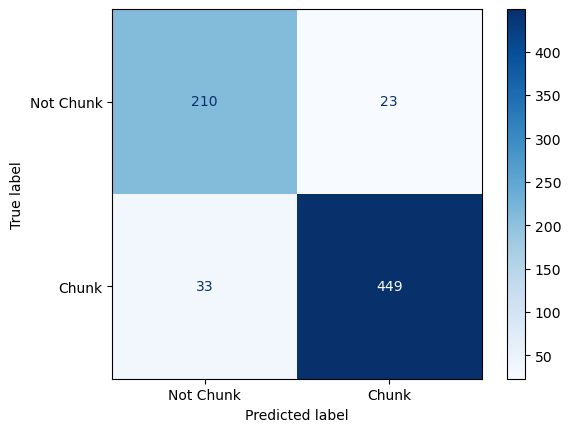

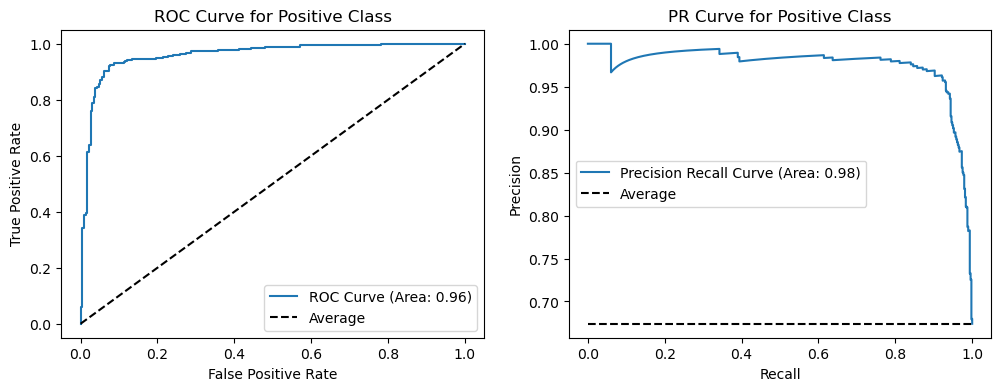

In [421]:
performance(ytest, best_model.predict(xtest))
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ypred_prob = best_model.predict_proba(xtest)[:,1]
plot_roc(ytest, ypred_prob)
plt.title("ROC Curve for Positive Class")
plt.subplot(1,2,2)
p, r, th = plot_prc(ytest, ypred_prob, 1)
plt.title("PR Curve for Positive Class")
plt.show()

#### Inference:
- The best estimator gives highest test accuracy of ~93% at the same time overfits the model
- Slightly improves the precision and recall scores
- Average fit time of the best model for this dataset is 3.5s

## XGBoost

In [422]:
xgb = XGBClassifier(random_state=42)
xgb.fit(xtrain, ytrain)
print("Training Score:", xgb.score(xtrain, ytrain))
print("Test Score:",  xgb.score(xtest, ytest))

Training Score: 1.0
Test Score: 0.9104895104895104


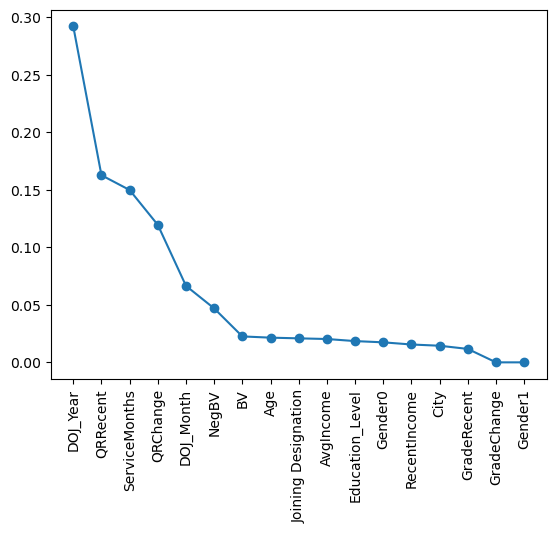

In [423]:
feature_score(xgb.feature_names_in_, xgb.feature_importances_)

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       233
           1       0.94      0.93      0.93       482

    accuracy                           0.91       715
   macro avg       0.90      0.90      0.90       715
weighted avg       0.91      0.91      0.91       715



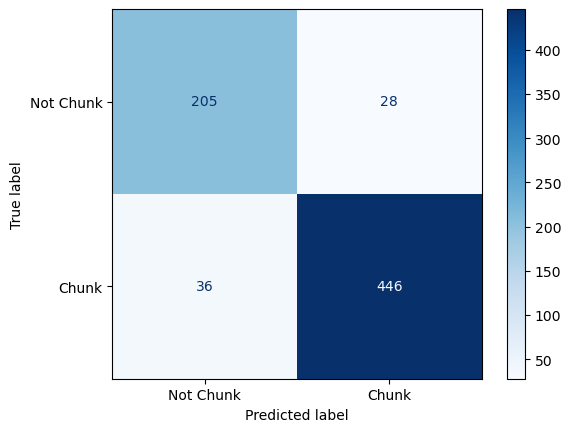

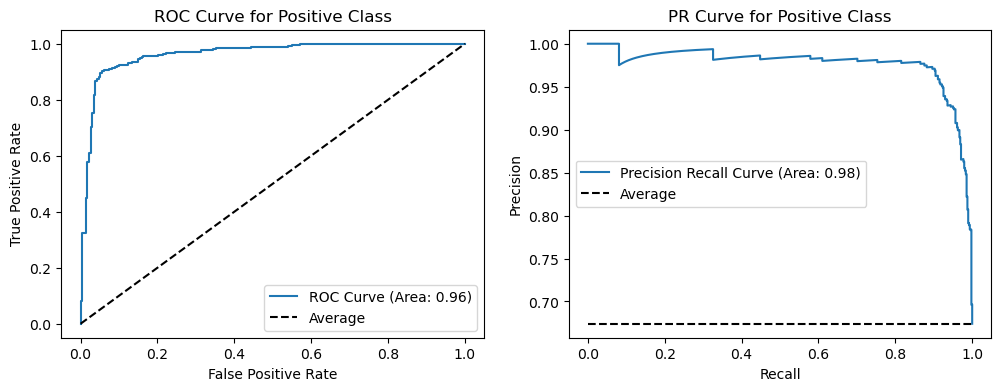

In [424]:
performance(ytest, xgb.predict(xtest))
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ypred_prob = xgb.predict_proba(xtest)[:,1]
plot_roc(ytest, ypred_prob)
plt.title("ROC Curve for Positive Class")
plt.subplot(1,2,2)
p, r, th = plot_prc(ytest, ypred_prob, 1)
plt.title("PR Curve for Positive Class")
plt.show()

### Hyperparameter Tuning

In [425]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.1, 1, 10]
}

In [426]:
grid_res = RandomizedSearchCV(estimator=xgb, param_distributions= params, cv = 3, scoring='accuracy')
grid_res.fit(xtrain, ytrain)

C:\Users\ADMIN\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:22:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ADMIN\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:22:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ADMIN\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:22:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_sa

C:\Users\ADMIN\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:22:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ADMIN\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:22:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ADMIN\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:22:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_sa

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [2, 3, 4, 5, 6],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   scoring='accuracy')

In [427]:
best_model = grid_res.best_estimator_
print("Training Score:", best_model.score(xtrain, ytrain))
print("Test Score:",  best_model.score(xtest, ytest))

Training Score: 0.9489795918367347
Test Score: 0.9174825174825175


              precision    recall  f1-score   support

           0       0.86      0.89      0.88       233
           1       0.95      0.93      0.94       482

    accuracy                           0.92       715
   macro avg       0.90      0.91      0.91       715
weighted avg       0.92      0.92      0.92       715



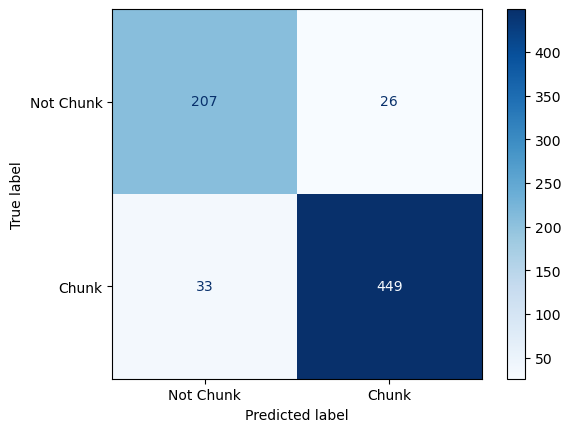

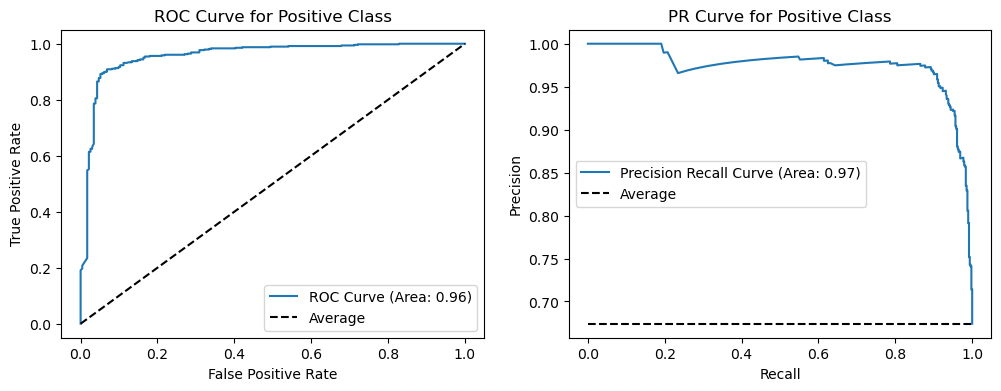

In [428]:
performance(ytest, best_model.predict(xtest))
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ypred_prob = best_model.predict_proba(xtest)[:,1]
plot_roc(ytest, ypred_prob)
plt.title("ROC Curve for Positive Class")
plt.subplot(1,2,2)
p, r, th = plot_prc(ytest, ypred_prob, 1)
plt.title("PR Curve for Positive Class")
plt.show()

#### Inference:
- Slightly improved the score compared to base model but similar performance as that of random forest model
- Improves the precision and recall score for class 1 at the cost of class 0
- Average fit time for this dataset is 0.4s that is ~10x speed compared to gradient boosting classifier 

# Insights

- Unnamed: 0 contains unique values, doesn't helpful for EDA and model building
- 24 reporting days of drivers are collected in the dataset
- Total number of drivers in the dataset are 2381 (Active: 765, Churned: 1616)
- The drivers are from 29 different Cities
- Average Income and Recent Income follows same distribution, also confirmed with kruskal walis test
- Average Business Value is significantly right skewed
- All the numerical features are severly affected with outliers
- After removing na values, Lastworkingdate - JoiningDate calculation gives many negative values indicating many errors in joining date column
- Most drivers are having quarterly rating of 1, indicating poor performance and Over 90% of drivers are graded between 1-3 (Average rating)
- Change in Quarterly Rating typically follows a normal distribution centered at 0, showing that most drivers experience no significant change in their ratings
- No of Negative Business Value rarely occurs, indicating minimal influence on driver churn prediction
- Joining designation of over 95% of drivers are at grades 1-3, with grade 1 signifying novice drivers.
- Majority of the drivers are joined after 2018, suggesting business growth and momentum post-2018
- Education Level is equally distributed among drivers, indicating no strong correlation with churn. Also confirmed in the feature importance score of the model.
- The dataset is heavily imbalanced with churned drivers of 68% and loyal/active drivers of 32%
- Churning behaviors:
	- Drivers with grades 1 and 2 are highly likely to churn, while those with grades 3-5 are very unlikely to churn
	- Drivers with joining designations of 1 and 2 tend to churn more frequently
	- Drivers with a large number of negative business values are highly likely to churn
	- Drivers with a recent quarterly rating of 1 are very highly likely to churn
	- Drivers with a positive change in their quarterly rating are very unlikely to churn
	- Drivers who joined in 2020 are very unlikely to churn
	- Drivers from city C20 are highly likely to churn, while those from city C29 are less likely to churn
	- Drivers with longer service durations are less likely to churn
	- Drivers contributing less business value are highly likely to churn
	- Drivers earning below-average income are highly likely to churn
	- Interestingly, Highly rated drivers or drivers with increase in quarterly rating churns more
	- Drivers with more number of negative business values churn less likely
	- Grade change and higher recent grade shows high possibility for churning, also confirmed it in the feature importance score of the model
- Mean Age of drivers doesn't show significant relation to distinguish between churn and non churn drivers, hence the feature may not support model for prediction
- Gender, Education Level and No. of negative business value features doesn't show significant relation with the churning of drivers and modeling results confirms the same	
- Both QQPlot and Shapiro wilk test confirms that none of the numerical features follow normal distribution

# Recommendations

- Dataset Transformation:
	- Group Age column by mean
	- Grading contains multiple values for each driver, hence recent grading and change in grading columns are created
	- Gender, City, Education Level, Date of Joining, Joining Designation are single value for each driver
	- LWD created it indicates the last working date exist or not. Target column (1: Churned Driver, 0: Non churned driver)
	- Quarterly Rating contains multiple values for each driver, hence recent QPR and change in QPR columns are created
	- Business value contains multiple values for each driver, hence Average business value and No. of negative business value columns are created
	- Income contains multiple values for each driver, hence recent income and average income columns are created
- Feature Transformation:
	- All the columns are numerical except city column that requires categorical encoding
	- Median and Mode values are imputed for null value in Age and Gender feature
	- Though categorical encoding not required for decision tree models, the implementation of the same through sklearn library requires it
	- One hot encoding for gender and frequency encoding for City, DOJ_Year, DOJ_Month are performed
- Modeling:
	- Logistic regression model exhibits poor performance in the classification with accuracy of 70% indicating the non linear relationship between the features and target
	- Decision Tree classifier shows better performance with an accuracy of 89% but it overfits to the training data indicating poor generalization
	- Random Forest model achieves similar accuracy as that of decision tree models but exhibits improvement in precision and recall scores
	- Gradient boosting classifier outperforms all the model with the highest accuracy of 93% and best precision and recall scores
	- XGBoost performs slightly lesser than gradient boosting but exhibits 10x faster fit time
	- Class weight balancing doesn't improve the performance of the prediction
- Conclusion:
	- Gradient Boosting is the top-performing model, while XGBoost offers a trade-off between performance and speed

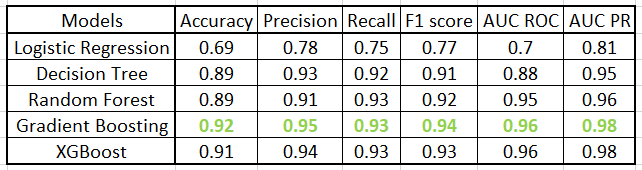

# Prepared by Muthukumar G